In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
validation = pd.read_csv('validation.csv')

In [3]:
train[1:10]

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,...,250,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,...,90,OtherView,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063"
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,...,90,FirstView,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063"
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,...,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,...,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"


In [4]:
dataset = pd.DataFrame()

In [5]:
dataset['advertiser'] = np.sort(train.advertiser.unique())
dataset['impressions'] = train.groupby('advertiser').size().values
click = train.groupby('advertiser').click.value_counts()
dataset['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values 
dataset['cost'] = train.groupby('advertiser').payprice.sum().values

In [6]:
dataset['CTR'] = (((dataset.clicks / dataset.impressions) 
                         * 100).round(3)).astype(str) + '%'

In [7]:
dataset['CPM'] = ((dataset.cost / dataset.impressions) .round(3)).astype(str)

In [8]:
dataset['eCPC'] = ((dataset.cost / dataset.clicks).round(3)).astype(str)

In [9]:
dataset

,advertiser,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,540293,451,37231239,0.083%,68.909,82552.636
1,2259,146778,45,13649026,0.031%,92.991,303311.689
2,2261,120619,37,10789152,0.031%,89.448,291598.703
3,2821,231416,144,20625766,0.062%,89.129,143234.486
4,2997,54487,251,3413227,0.461%,62.643,13598.514
5,3358,304782,233,28145288,0.076%,92.346,120795.227
6,3386,498554,358,38341028,0.072%,76.904,107097.844
7,3427,454031,340,36820111,0.075%,81.096,108294.444
8,3476,346778,175,27481402,0.05%,79.248,157036.583


# Analysis on user feedback


## daily CTR

In [10]:
daily_imps = pd.DataFrame()
advertiser_list = [1458,2259,2261,2821,2997,3358,3386,3427,3476]

In [11]:
daily_imps['weekday'] = np.sort(train.weekday.unique())
imps = train.groupby('weekday').advertiser.value_counts()

In [12]:
for j in advertiser_list:
        daily_imps[j] = 0

In [13]:
for i in daily_imps['weekday']:
    x = 0
    for j in imps[i].index:
        daily_imps[j][i] = imps[i].values[x]
        x = x+1

In [14]:
daily_imps.columns = ['weekday','imps_1458','imps_2259','imps_2261','imps_2821'
                      ,'imps_2997','imps_3358','imps_3386','imps_3427','imps_3476']

In [15]:
daily_imps

,weekday,imps_1458,imps_2259,imps_2261,imps_2821,imps_2997,imps_3358,imps_3386,imps_3427,imps_3476
0,0,83994,39362,0,109286,0,33238,77969,56494,64898
1,1,72204,29689,0,92454,0,30707,67122,61534,54707
2,2,73810,0,0,29676,9621,26206,68854,67251,52633
3,3,76509,0,27110,0,15951,81073,67776,64954,46738
4,4,76835,0,36862,0,19046,41414,71714,66368,49137
5,5,78485,40127,37260,0,9869,58888,68955,68344,16100
6,6,78456,37600,19387,0,0,33256,76164,69086,62565


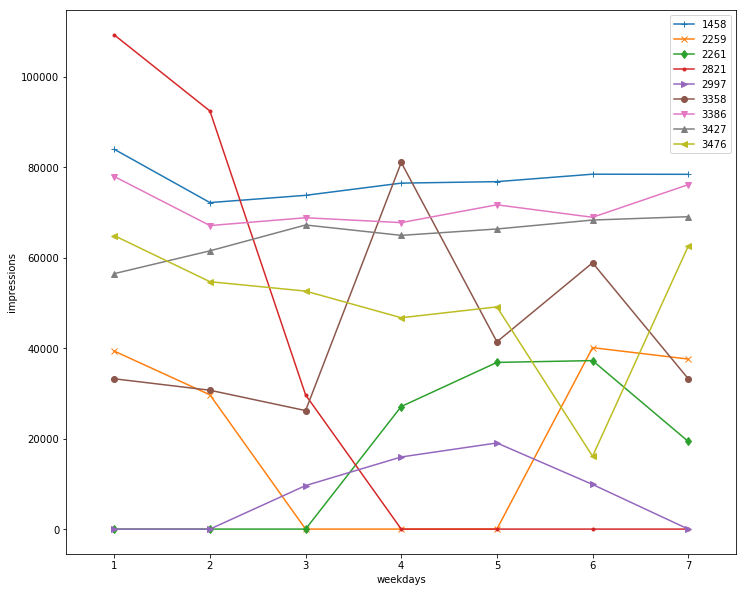

In [16]:
f, ax = plt.subplots(1)
ax.plot(1+daily_imps.weekday.values, daily_imps.imps_1458.values, marker = '+', label='1458')
ax.plot(1+daily_imps.weekday.values, daily_imps.imps_2259.values, marker = 'x', label='2259')
ax.plot(1+daily_imps.weekday.values, daily_imps.imps_2261.values, marker = 'd', label='2261')
ax.plot(1+daily_imps.weekday.values, daily_imps.imps_2821.values, marker = '.', label='2821')
ax.plot(1+daily_imps.weekday.values, daily_imps.imps_2997.values, marker = '>', label='2997')
ax.plot(1+daily_imps.weekday.values, daily_imps.imps_3358.values, marker = 'o', label='3358')
ax.plot(1+daily_imps.weekday.values, daily_imps.imps_3386.values, marker = 'v', label='3386')
ax.plot(1+daily_imps.weekday.values, daily_imps.imps_3427.values, marker = '^', label='3427')
ax.plot(1+daily_imps.weekday.values, daily_imps.imps_3476.values, marker = '<', label='3476')
plt.legend()
plt.ylabel('impressions')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(12,10)
plt.draw()
plt.show()

In [17]:
daily_clicks = pd.DataFrame()
daily_clicks['weekday'] = np.sort(train.weekday.unique())

In [18]:
clicks = train.groupby(['advertiser','weekday']).click.value_counts()

In [19]:
for j in advertiser_list:
    daily_clicks[j] = 0

In [20]:
for i in advertiser_list:
    for j in daily_clicks['weekday']:
        if clicks.iloc[clicks.index.get_level_values('advertiser') == i][i][j].empty:
            daily_clicks[i][j] = 0
        else:
            daily_clicks[i][j] = clicks.iloc[clicks.index.get_level_values('advertiser') == i][i][j][1]

In [21]:
daily_clicks.columns = ['weekday','clicks_1458','clicks_2259','clicks_2261','clicks_2821'
                      ,'clicks_2997','clicks_3358','clicks_3386','clicks_3427','clicks_3476']

In [22]:
daily_clicks

,weekday,clicks_1458,clicks_2259,clicks_2261,clicks_2821,clicks_2997,clicks_3358,clicks_3386,clicks_3427,clicks_3476
0,0,66,11,0,71,0,21,50,46,28
1,1,63,14,0,64,0,11,47,43,35
2,2,63,0,0,9,87,14,43,54,28
3,3,68,0,9,0,68,79,49,46,26
4,4,72,0,6,0,69,39,57,44,24
5,5,65,10,17,0,27,50,69,57,4
6,6,54,10,5,0,0,19,43,50,30


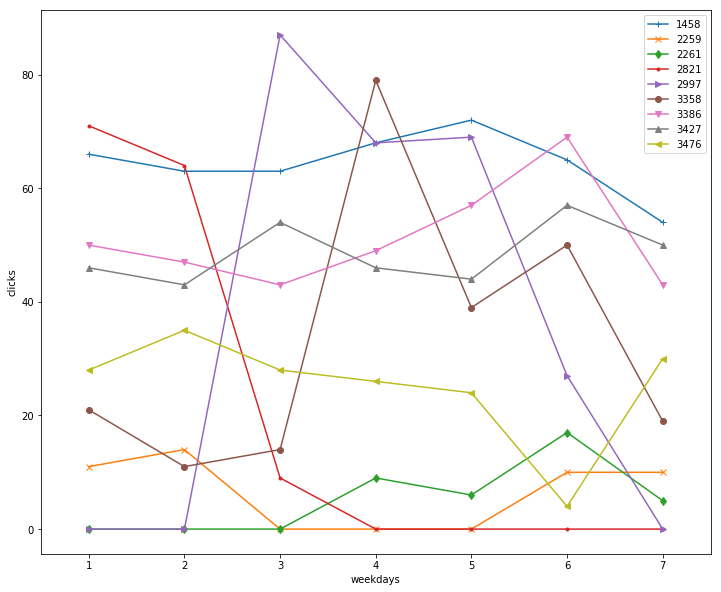

In [23]:
f, ax = plt.subplots(1)
ax.plot(1+daily_clicks.weekday.values, daily_clicks.clicks_1458.values, marker = '+', label='1458')
ax.plot(1+daily_clicks.weekday.values, daily_clicks.clicks_2259.values,marker='x', label='2259')
ax.plot(1+daily_clicks.weekday.values, daily_clicks.clicks_2261.values, marker = 'd', label='2261')
ax.plot(1+daily_clicks.weekday.values, daily_clicks.clicks_2821.values, marker = '.', label='2821')
ax.plot(1+daily_clicks.weekday.values, daily_clicks.clicks_2997.values, marker = '>', label='2997')
ax.plot(1+daily_clicks.weekday.values, daily_clicks.clicks_3358.values, marker = 'o', label='3358')
ax.plot(1+daily_clicks.weekday.values, daily_clicks.clicks_3386.values, marker = 'v', label='3386')
ax.plot(1+daily_clicks.weekday.values, daily_clicks.clicks_3427.values, marker = '^', label='3427')
ax.plot(1+daily_clicks.weekday.values, daily_clicks.clicks_3476.values, marker = '<', label='3476')
plt.legend()
plt.ylabel('clicks')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(12,10)
plt.draw()
plt.show()

In [24]:
daily_CTR = pd.DataFrame()
daily_CTR['weekday'] = np.sort(train.weekday.unique())
daily_CTR['CTR_1458'] = ((daily_clicks.clicks_1458 / daily_imps.imps_1458) * 100).round(3)
daily_CTR['CTR_2259'] = ((daily_clicks.clicks_2259 / daily_imps.imps_2259) * 100).round(3)
daily_CTR['CTR_2261'] = ((daily_clicks.clicks_2261 / daily_imps.imps_2261) * 100).round(3)
daily_CTR['CTR_2821'] = ((daily_clicks.clicks_2821 / daily_imps.imps_2821) * 100).round(3)
daily_CTR['CTR_2997'] = ((daily_clicks.clicks_2997 / daily_imps.imps_2997) * 100).round(3)
daily_CTR['CTR_3358'] = ((daily_clicks.clicks_3358 / daily_imps.imps_3358) * 100).round(3)
daily_CTR['CTR_3386'] = ((daily_clicks.clicks_3386 / daily_imps.imps_3386) * 100).round(3)
daily_CTR['CTR_3427'] = ((daily_clicks.clicks_3427 / daily_imps.imps_3427) * 100).round(3)
daily_CTR['CTR_3476'] = ((daily_clicks.clicks_3476 / daily_imps.imps_3476) * 100).round(3)
daily_CTR.fillna(value= 0 )

,weekday,CTR_1458,CTR_2259,CTR_2261,CTR_2821,CTR_2997,CTR_3358,CTR_3386,CTR_3427,CTR_3476
0,0,0.079,0.028,0.000,0.065,0.000,0.063,0.064,0.081,0.043
1,1,0.087,0.047,0.000,0.069,0.000,0.036,0.070,0.070,0.064
2,2,0.085,0.000,0.000,0.030,0.904,0.053,0.062,0.080,0.053
3,3,0.089,0.000,0.033,0.000,0.426,0.097,0.072,0.071,0.056
4,4,0.094,0.000,0.016,0.000,0.362,0.094,0.079,0.066,0.049
5,5,0.083,0.025,0.046,0.000,0.274,0.085,0.100,0.083,0.025
6,6,0.069,0.027,0.026,0.000,0.000,0.057,0.056,0.072,0.048


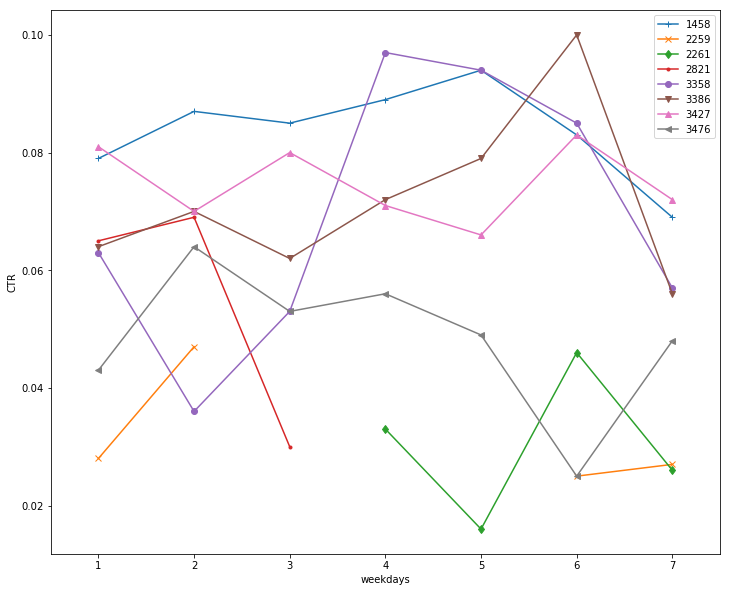

In [25]:
f, ax = plt.subplots(1)
ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_2259.values,marker='x', label='2259')
ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_2261.values, marker = 'd', label='2261')
ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_2821.values, marker = '.', label='2821')
#ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_2997.values, marker = '>', label='2997')
ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_3358.values, marker = 'o', label='3358')
ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_3386.values, marker = 'v', label='3386')
ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_3427.values, marker = '^', label='3427')
ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_3476.values, marker = '<', label='3476')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
#ax.set_ylim(ymin = 0.0 , ymax = 0.2)
f.set_size_inches(12,10)
plt.draw()
plt.show()

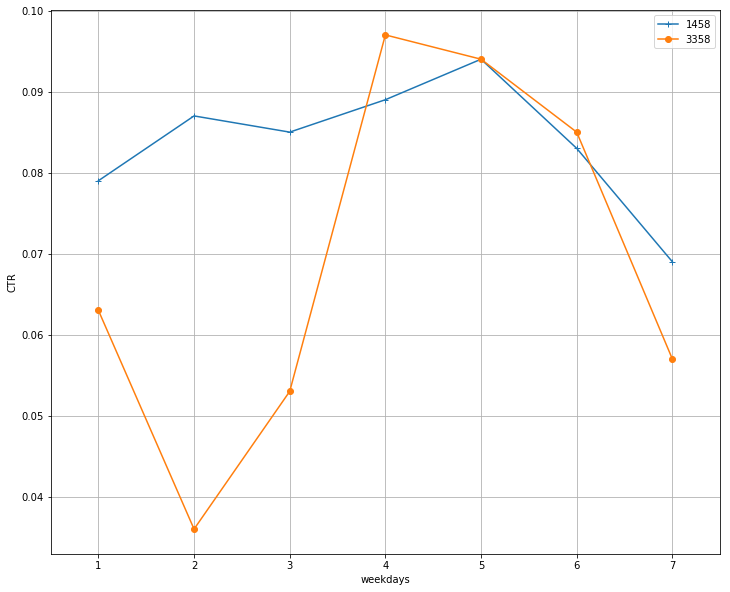

In [26]:
f, ax = plt.subplots(1)
ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_1458.values, marker = '+', label='1458')
#ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_2259.values,marker='x', label='2259')
#ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_2261.values, marker = 'd', label='2261')
#ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_2821.values, marker = '.', label='2821')
#ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_2997.values, marker = '>', label='2997')
ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_3358.values, marker = 'o', label='3358')
#ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_3386.values, marker = 'v', label='3386')
#ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_3427.values, marker = '^', label='3427')
#ax.plot(1+daily_CTR.weekday.values, daily_CTR.CTR_3476.values, marker = '<', label='3476')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
plt.grid(True)
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
#ax.set_ylim(ymin = 0.0 , ymax = 0.2)
f.set_size_inches(12,10)
plt.draw()
plt.show()

## CTR per hour 

In [27]:
hourly_imps = pd.DataFrame()
hourly_imps['hour'] = np.sort(train.hour.unique())
imps = train.groupby('hour').advertiser.value_counts()

In [28]:
for j in advertiser_list:
        hourly_imps[j] = 0

In [29]:
for i in hourly_imps['hour']:
    x = 0
    for j in imps[i].index:
        hourly_imps[j][i] = imps[i].values[x]
        x = x+1

In [30]:
hourly_imps.columns = ['hour','imps_1458','imps_2259','imps_2261','imps_2821'
                      ,'imps_2997','imps_3358','imps_3386','imps_3427','imps_3476']

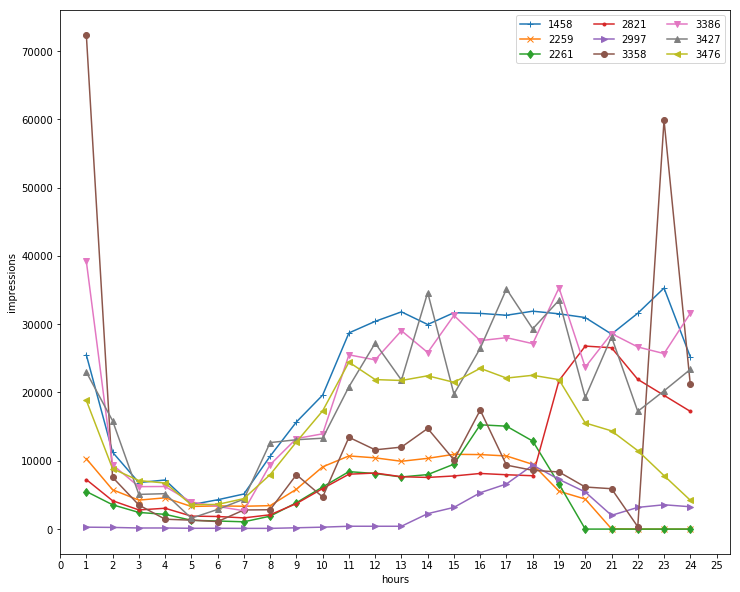

In [31]:
f, ax = plt.subplots(1)
ax.plot(1+hourly_imps.hour.values, hourly_imps.imps_1458.values, marker = '+', label='1458')
ax.plot(1+hourly_imps.hour.values, hourly_imps.imps_2259.values, marker = 'x', label='2259')
ax.plot(1+hourly_imps.hour.values, hourly_imps.imps_2261.values, marker = 'd', label='2261')
ax.plot(1+hourly_imps.hour.values, hourly_imps.imps_2821.values, marker = '.', label='2821')
ax.plot(1+hourly_imps.hour.values, hourly_imps.imps_2997.values, marker = '>', label='2997')
ax.plot(1+hourly_imps.hour.values, hourly_imps.imps_3358.values, marker = 'o', label='3358')
ax.plot(1+hourly_imps.hour.values, hourly_imps.imps_3386.values, marker = 'v', label='3386')
ax.plot(1+hourly_imps.hour.values, hourly_imps.imps_3427.values, marker = '^', label='3427')
ax.plot(1+hourly_imps.hour.values, hourly_imps.imps_3476.values, marker = '<', label='3476')
plt.legend(ncol = 3,loc=1)
plt.ylabel('impressions')
plt.xlabel('hours')
ax.set_xlim(xmin = 0 , xmax = 25.5)
ax.xaxis.set_major_locator( MultipleLocator(1) )
f.set_size_inches(12,10)
plt.draw()
plt.show()

In [32]:
hourly_clicks = pd.DataFrame()
hourly_clicks['hour'] = np.sort(train.hour.unique())

In [33]:
clicks = train.groupby(['advertiser','hour']).click.value_counts()

In [34]:
for j in advertiser_list:
    hourly_clicks[j] = 0

In [35]:
for i in advertiser_list:
    for j in hourly_clicks['hour']:
        if len(clicks.iloc[clicks.index.get_level_values('advertiser') == i][i][j])<=1:
            hourly_clicks[i][j] = 0
        else:
            hourly_clicks[i][j] = clicks.iloc[clicks.index.get_level_values('advertiser') == i][i][j][1]

In [36]:
hourly_clicks.columns = ['hour','clicks_1458','clicks_2259','clicks_2261','clicks_2821'
                      ,'clicks_2997','clicks_3358','clicks_3386','clicks_3427','clicks_3476']

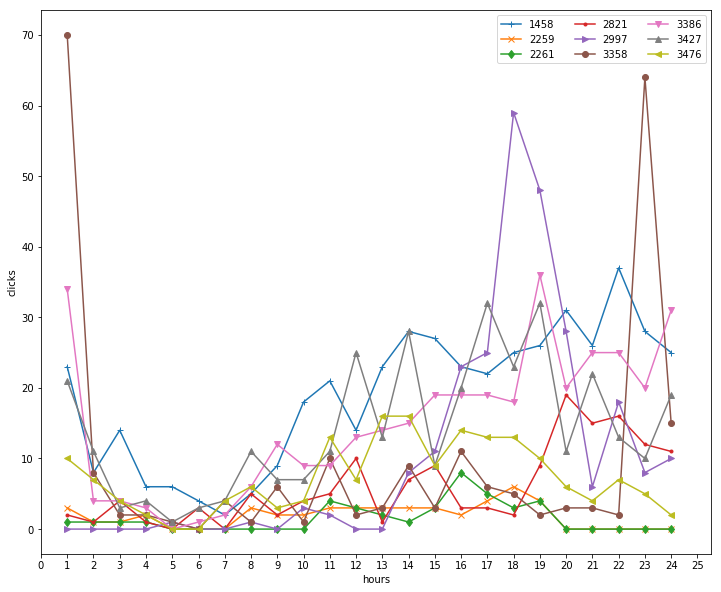

In [37]:
f, ax = plt.subplots(1)
ax.plot(1+hourly_clicks.hour.values, hourly_clicks.clicks_1458.values, marker = '+', label='1458')
ax.plot(1+hourly_clicks.hour.values, hourly_clicks.clicks_2259.values,marker='x', label='2259')
ax.plot(1+hourly_clicks.hour.values, hourly_clicks.clicks_2261.values, marker = 'd', label='2261')
ax.plot(1+hourly_clicks.hour.values, hourly_clicks.clicks_2821.values, marker = '.', label='2821')
ax.plot(1+hourly_clicks.hour.values, hourly_clicks.clicks_2997.values, marker = '>', label='2997')
ax.plot(1+hourly_clicks.hour.values, hourly_clicks.clicks_3358.values, marker = 'o', label='3358')
ax.plot(1+hourly_clicks.hour.values, hourly_clicks.clicks_3386.values, marker = 'v', label='3386')
ax.plot(1+hourly_clicks.hour.values, hourly_clicks.clicks_3427.values, marker = '^', label='3427')
ax.plot(1+hourly_clicks.hour.values, hourly_clicks.clicks_3476.values, marker = '<', label='3476')
plt.legend(ncol = 3,loc=1)
plt.ylabel('clicks')
plt.xlabel('hours')
ax.set_xlim(xmin = 0 , xmax = 25.5)
ax.xaxis.set_major_locator( MultipleLocator(1) )
f.set_size_inches(12,10)
plt.draw()
plt.show()

In [38]:
hourly_CTR = pd.DataFrame()
hourly_CTR['hour'] = np.sort(train.hour.unique())
hourly_CTR['CTR_1458'] = ((hourly_clicks.clicks_1458 / hourly_imps.imps_1458) * 100).round(3)
hourly_CTR['CTR_2259'] = ((hourly_clicks.clicks_2259 / hourly_imps.imps_2259) * 100).round(3)
hourly_CTR['CTR_2261'] = ((hourly_clicks.clicks_2261 / hourly_imps.imps_2261) * 100).round(3)
hourly_CTR['CTR_2821'] = ((hourly_clicks.clicks_2821 / hourly_imps.imps_2821) * 100).round(3)
hourly_CTR['CTR_2997'] = ((hourly_clicks.clicks_2997 / hourly_imps.imps_2997) * 100).round(3)
hourly_CTR['CTR_3358'] = ((hourly_clicks.clicks_3358 / hourly_imps.imps_3358) * 100).round(3)
hourly_CTR['CTR_3386'] = ((hourly_clicks.clicks_3386 / hourly_imps.imps_3386) * 100).round(3)
hourly_CTR['CTR_3427'] = ((hourly_clicks.clicks_3427 / hourly_imps.imps_3427) * 100).round(3)
hourly_CTR['CTR_3476'] = ((hourly_clicks.clicks_3476 / hourly_imps.imps_3476) * 100).round(3)
hourly_CTR.fillna(value= 0 )

,hour,CTR_1458,CTR_2259,CTR_2261,CTR_2821,CTR_2997,CTR_3358,CTR_3386,CTR_3427,CTR_3476
0,0,0.090,0.029,0.018,0.028,0.000,0.097,0.087,0.091,0.053
1,1,0.071,0.017,0.028,0.024,0.000,0.105,0.043,0.069,0.079
2,2,0.206,0.024,0.041,0.143,0.000,0.057,0.064,0.059,0.056
3,3,0.083,0.044,0.046,0.033,0.000,0.138,0.048,0.077,0.030
4,4,0.168,0.000,0.000,0.000,0.855,0.077,0.000,0.063,0.000
5,5,0.093,0.000,0.000,0.163,0.000,0.000,0.030,0.104,0.000
6,6,0.039,0.000,0.000,0.000,0.000,0.143,0.075,0.091,0.090
7,7,0.047,0.087,0.000,0.239,0.943,0.035,0.064,0.087,0.075
8,8,0.057,0.034,0.000,0.054,0.000,0.075,0.091,0.054,0.024
9,9,0.092,0.022,0.000,0.067,1.060,0.021,0.065,0.053,0.023


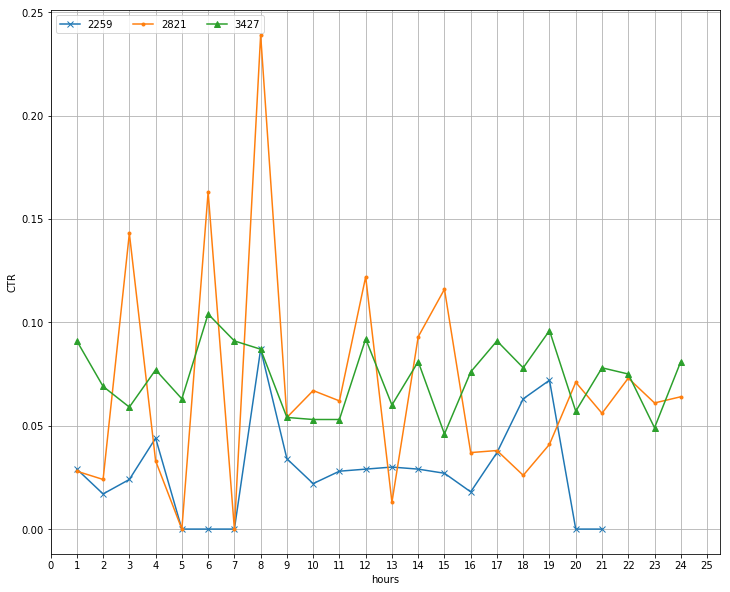

In [347]:
f, ax = plt.subplots(1)
#ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_2259.values,marker='x', label='2259')
#ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_2261.values, marker = 'd', label='2261')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_2821.values, marker = '.', label='2821')
#ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_2997.values, marker = '>', label='2997')
#ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3358.values, marker = 'o', label='3358')
#ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3386.values, marker = 'v', label='3386')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3427.values, marker = '^', label='3427')
#ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3476.values, marker = '<', label='3476')
plt.legend(ncol = 3,loc=2)
plt.ylabel('CTR')
plt.xlabel('hours')
plt.grid(True)
ax.set_xlim(xmin = 0 , xmax = 25.5)
ax.xaxis.set_major_locator( MultipleLocator(1) )
f.set_size_inches(12,10)
plt.draw()
plt.show()

## CTR per region

In [40]:
region_CTR = pd.DataFrame()
region_CTR['region'] = np.sort(train.region.unique())


In [41]:
imps = train.groupby('region').advertiser.value_counts()

In [42]:
region_CTR['imps_1458'] = imps.iloc[imps.index.get_level_values('advertiser') == 1458].values 

In [43]:
region_CTR['imps_3358'] = imps.iloc[imps.index.get_level_values('advertiser') == 3358].values

In [44]:
clicks = train.groupby(['advertiser','region']).click.value_counts()

In [45]:
click_1458 = clicks.iloc[clicks.index.get_level_values('advertiser') == 1458]
click_1458.iloc[click_1458.index.get_level_values('click') == 0]=0
region_CTR['clicks_1458'] = click_1458.groupby(level='region').sum().values

In [46]:
click_3358 = clicks.iloc[clicks.index.get_level_values('advertiser') == 3358]
click_3358.iloc[click_3358.index.get_level_values('click') == 0]=0
region_CTR['clicks_3358'] = click_3358.groupby(level='region').sum().values

In [47]:
region_CTR['CTR_1458'] = ((region_CTR.clicks_1458 / region_CTR.imps_1458) * 100).round(3)
region_CTR['CTR_3358'] = ((region_CTR.clicks_3358 / region_CTR.imps_3358) * 100).round(3)

In [48]:
region_CTR

,region,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,7844,6162,9,13,0.115,0.211
1,1,23389,12157,17,6,0.073,0.049
2,2,8875,4820,3,2,0.034,0.041
3,3,27398,13246,20,15,0.073,0.113
4,15,16674,7968,18,7,0.108,0.088
5,27,7616,3754,5,3,0.066,0.080
6,40,20449,8965,9,6,0.044,0.067
7,55,12091,4823,11,2,0.091,0.041
8,65,12566,5684,11,5,0.088,0.088
9,79,14300,9523,17,9,0.119,0.095


([<matplotlib.axis.XTick at 0x111c810f0>,
 <a list of 35 Text xticklabel objects>)

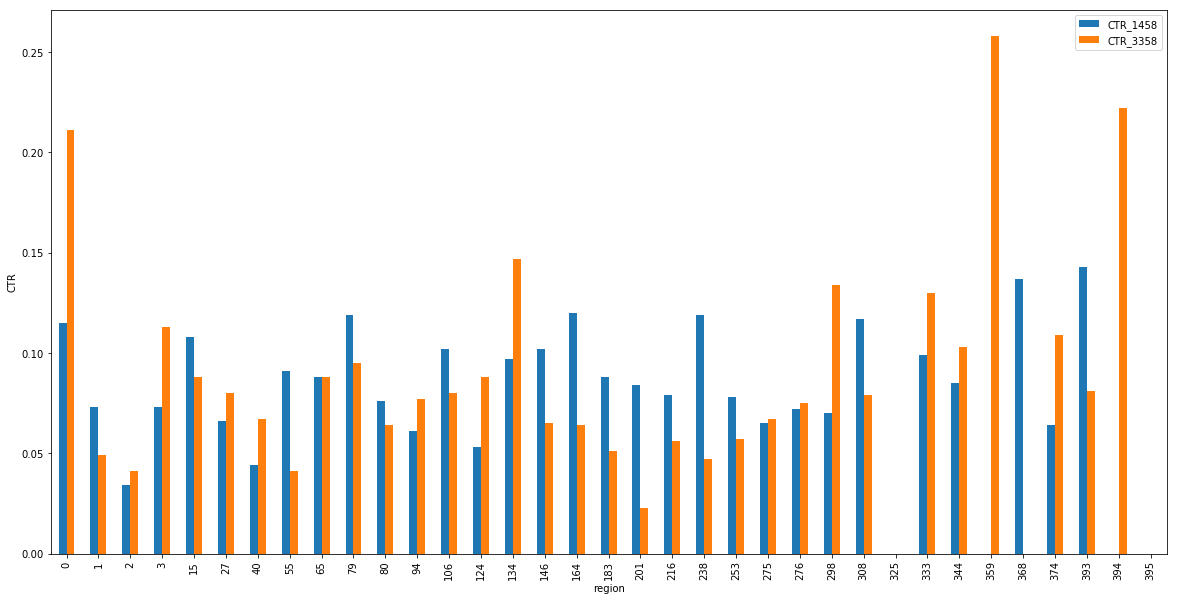

In [49]:
a1=region_CTR[['CTR_1458','CTR_3358']]
a1.plot(by='region', kind = 'bar',figsize=(20,10) )
plt.ylabel('CTR')
plt.xlabel('region')
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,
            15,16,17,18,19,20,21,22,23,24,25,26,
            27,28,29,30,31,32,33,34),
           (u'0',u'1',u'2',u'3',u'15',
            u'27',u'40',u'55',u'65',
            u'79',u'80',u'94',u'106',
           u'124',u'134',u'146',u'164',
           u'183',u'201',u'216',u'238',
           u'253',u'275',u'276',u'298',
           u'308',u'325',u'333',u'344',
           u'359',u'368',u'374',u'393',
           u'394',u'395'))
#a1 = Browser_price[['Browser','price_1458','price_3358']]
#a1.plot(by='price',kind='bar',figsize=(6,4))
#plt.ylabel('price')
#plt.xlabel('Browser')
#plt.xticks((0,1,2,3,4,5,6,7,8),(u'chrome',u'firefox',u'ie',u'maxthon',u'opera',u'other',u'safari',u'sogou',u'theworld'))




## CTR per ad exchange 

In [50]:
ad_exchange_CTR = pd.DataFrame()
ad_exchange_CTR['ad_exchange'] = np.sort(train.adexchange.unique())

In [51]:
ad_exchange_CTR = ad_exchange_CTR.drop([3,4])

In [52]:
imps = train.groupby('adexchange').advertiser.value_counts()

In [53]:
ad_exchange_CTR['imps_1458'] = imps.iloc[imps.index.get_level_values('advertiser') == 1458].values 
ad_exchange_CTR['imps_3358'] = imps.iloc[imps.index.get_level_values('advertiser') == 3358].values 

In [54]:
clicks = train.groupby(['advertiser','adexchange']).click.value_counts()

In [55]:
click_1458 = clicks.iloc[clicks.index.get_level_values('advertiser') == 1458]
click_1458.iloc[click_1458.index.get_level_values('click') == 0]=0
ad_exchange_CTR['clicks_1458'] = click_1458.groupby(level='adexchange').sum().values

In [56]:
click_3358 = clicks.iloc[clicks.index.get_level_values('advertiser') == 3358]
click_3358.iloc[click_3358.index.get_level_values('click') == 0]=0
ad_exchange_CTR['clicks_3358'] = click_3358.groupby(level='adexchange').sum().values

In [57]:
ad_exchange_CTR['CTR_1458'] = ((ad_exchange_CTR.clicks_1458 / ad_exchange_CTR.imps_1458) * 100).round(3)
ad_exchange_CTR['CTR_3358'] = ((ad_exchange_CTR.clicks_3358 / ad_exchange_CTR.imps_3358) * 100).round(3)

In [58]:
ad_exchange_CTR

,ad_exchange,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,1,182219,159379,146,146,0.080,0.092
1,2,160460,93691,126,48,0.079,0.051
2,3,197614,51712,179,39,0.091,0.075


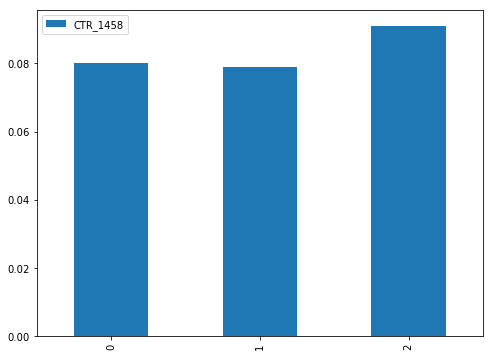

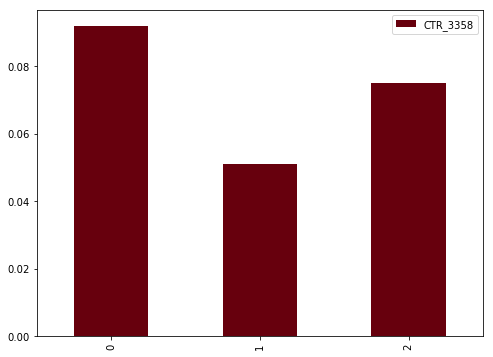

In [59]:
a1 = ad_exchange_CTR[['ad_exchange','CTR_1458']]
a1.plot(by='ad_exchange',kind='bar',figsize=(8,6))
a2 = ad_exchange_CTR[['ad_exchange','CTR_3358']]
a2.plot(by='ad_exchange',kind='bar',colormap='Reds_r',figsize=(8,6))

## daily price

In [60]:
daily_price = pd.DataFrame()
daily_price['weekday'] = np.sort(train.weekday.unique())

In [61]:
for j in advertiser_list:
    daily_price[j] = 0.0

In [62]:
price = train.groupby(['advertiser','weekday']).payprice.value_counts()

In [63]:
for i in advertiser_list:
    for j in daily_price['weekday']:
        if len(price.iloc[price.index.get_level_values('advertiser') == i][i][j])<1:
            daily_price[i][j] = 0
        else:
            total_price = 0
            number = 0
            for a in range(len(price[i][j])):
                total_price = price[i][j].index[a] * price[i][j].values[a] + total_price
                number = price[i][j].values[a] + number
            daily_price[i][j] = (total_price / number).round(3)
             
            

/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [64]:
daily_price.columns = ['weekday','price_1458','price_2259','price_2261','price_2821'
                      ,'price_2997','price_3358','price_3386','price_3427','price_3476']

In [65]:
daily_price

,weekday,price_1458,price_2259,price_2261,price_2821,price_2997,price_3358,price_3386,price_3427,price_3476
0,0,63.362,100.158,0.000,86.330,0.000,89.443,68.123,74.185,78.900
1,1,73.674,98.600,0.000,89.218,0.000,92.802,79.444,84.746,82.430
2,2,71.925,0.000,0.000,99.154,56.456,97.374,82.076,83.871,82.945
3,3,69.864,0.000,81.156,0.000,61.103,86.557,80.564,83.881,77.410
4,4,69.406,0.000,90.277,0.000,67.134,97.588,79.805,81.636,77.014
5,5,67.640,86.555,96.657,0.000,62.495,97.102,79.881,81.036,73.801
6,6,67.477,87.928,85.613,0.000,0.000,90.025,70.299,77.719,78.244


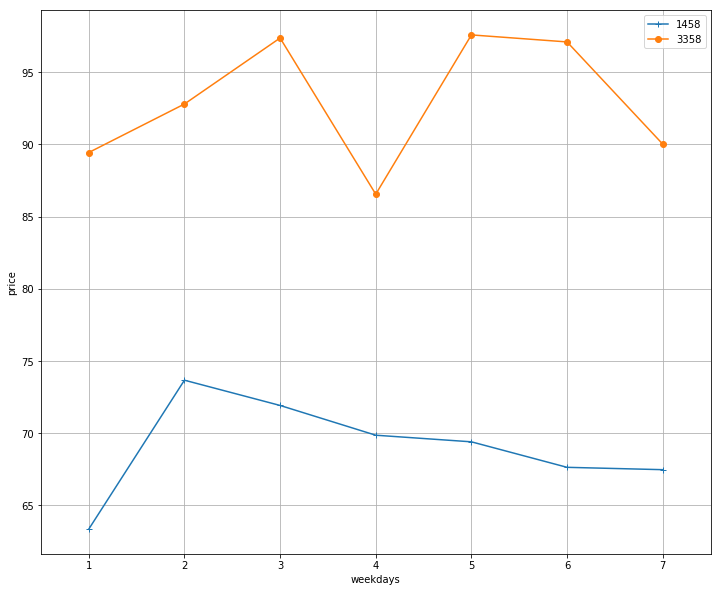

In [66]:
f, ax = plt.subplots(1)
ax.plot(1+daily_price.weekday.values, daily_price.price_1458.values, marker = '+', label='1458')
#ax.plot(1+daily_price.weekday.values, daily_price.price_2259.values, marker = 'x', label='2259')
#ax.plot(1+daily_price.weekday.values, daily_price.price_2261.values, marker = 'd', label='2261')
#ax.plot(1+daily_price.weekday.values, daily_price.price_2821.values, marker = '.', label='2821')
#ax.plot(1+daily_price.weekday.values, daily_price.price_2997.values, marker = '>', label='2997')
ax.plot(1+daily_price.weekday.values, daily_price.price_3358.values, marker = 'o', label='3358')
#ax.plot(1+daily_price.weekday.values, daily_price.price_3386.values, marker = 'v', label='3386')
#ax.plot(1+daily_price.weekday.values, daily_price.price_3427.values, marker = '^', label='3427')
#ax.plot(1+daily_price.weekday.values, daily_price.price_3476.values, marker = '<', label='3476')
plt.legend()
plt.ylabel('price')
plt.xlabel('weekdays')
plt.grid(True)
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(12,10)
plt.draw()
plt.show()

## hourly price

In [67]:
hourly_price = pd.DataFrame()
hourly_price['hour'] = np.sort(train.hour.unique())

In [68]:
price = train.groupby(['advertiser','hour']).payprice.value_counts()

In [69]:
for j in advertiser_list:
    hourly_price[j] = 0.0

In [70]:
for i in advertiser_list:
    for j in hourly_price['hour']:
        if len(price.iloc[price.index.get_level_values('advertiser') == i][i][j])<1:
            hourly_price[i][j] = 0
        else:
            total_price = 0
            number = 0
            for a in range(len(price[i][j])):
                total_price = price[i][j].index[a] * price[i][j].values[a] + total_price
                number = price[i][j].values[a] + number
            hourly_price[i][j] = (total_price / number).round(3)

/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [71]:
hourly_price.columns = ['hour','price_1458','price_2259','price_2261','price_2821'
                      ,'price_2997','price_3358','price_3386','price_3427','price_3476']

In [72]:
hourly_price

,hour,price_1458,price_2259,price_2261,price_2821,price_2997,price_3358,price_3386,price_3427,price_3476
0,0,65.926,83.342,85.453,82.608,42.335,111.721,94.471,87.310,80.109
1,1,62.691,73.139,80.107,72.316,49.122,80.281,56.607,80.200,71.904
2,2,64.749,70.950,76.217,68.750,48.752,74.981,51.860,67.851,70.971
3,3,69.674,71.415,75.480,68.565,46.061,69.877,53.549,84.073,72.381
4,4,67.366,71.272,78.617,73.583,57.949,79.054,56.701,67.772,74.095
5,5,70.694,72.556,85.003,76.994,68.109,68.617,55.334,75.042,73.019
6,6,65.181,78.417,91.239,90.285,66.943,102.726,56.833,74.618,76.233
7,7,69.261,82.798,96.710,99.954,69.377,77.020,75.509,83.220,80.570
8,8,71.642,87.831,97.969,97.867,71.430,82.041,80.667,83.496,82.673
9,9,68.199,88.226,90.631,93.305,73.618,78.429,69.976,74.126,77.581


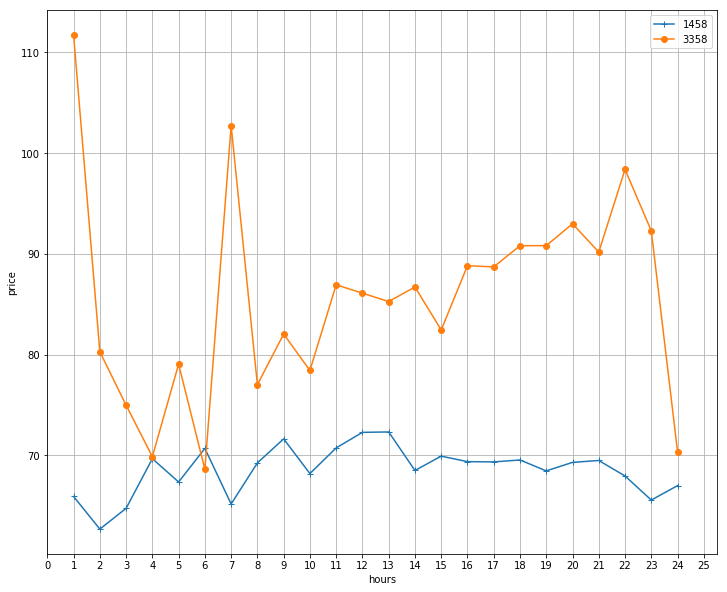

In [73]:
f, ax = plt.subplots(1)
ax.plot(1+hourly_price.hour.values, hourly_price.price_1458.values, marker = '+', label='1458')
#ax.plot(1+hourly_price.hour.values, hourly_price.price_2259.values, marker = 'x', label='2259')
#ax.plot(1+hourly_price.hour.values, hourly_price.price_2261.values, marker = 'd', label='2261')
#ax.plot(1+hourly_price.hour.values, hourly_price.price_2821.values, marker = '.', label='2821')
a#x.plot(1+hourly_price.hour.values, hourly_price.price_2997.values, marker = '>', label='2997')
ax.plot(1+hourly_price.hour.values, hourly_price.price_3358.values, marker = 'o', label='3358')
#ax.plot(1+hourly_price.hour.values, hourly_price.price_3386.values, marker = 'v', label='3386')
#ax.plot(1+hourly_price.hour.values, hourly_price.price_3427.values, marker = '^', label='3427')
#ax.plot(1+hourly_price.hour.values, hourly_price.price_3476.values, marker = '<', label='3476')
plt.legend()
plt.ylabel('price')
plt.xlabel('hours')
ax.set_xlim(xmin = 0 , xmax = 25.5)
plt.grid(True)
ax.xaxis.set_major_locator( MultipleLocator(1) )
f.set_size_inches(12,10)
plt.draw()
plt.show()

In [74]:
train['os'] = train['useragent'].map(lambda x:x.split('_')[0])
train['Browser'] = train['useragent'].map(lambda x:x.split('_')[1])

## OS price

In [75]:
os_price = pd.DataFrame()
os_price['os'] = np.sort(train.os.unique())

In [76]:
for j in advertiser_list:
    os_price[j] = 0.00

In [77]:
price = train.groupby(['advertiser','os']).payprice.value_counts()

In [78]:
for i in advertiser_list:
    for j in range(len(os_price['os'])):
        if len(price.iloc[price.index.get_level_values('advertiser') == i][i][os_price.loc[j][0]])<1:
            os_price[i][j] = 0
        else:
            total_price = 0
            number = 0
            for a in range(len(price[i][os_price.loc[j][0]])):
                total_price = price[i][os_price.loc[j][0]].index[a] * price[i][os_price.loc[j][0]].values[a] + total_price
                number = price[i][os_price.loc[j][0]].values[a] + number
            os_price[i][j] = (total_price / number).round(3)

/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [79]:
os_price.columns = ['os','price_1458','price_2259','price_2261','price_2821'
                      ,'price_2997','price_3358','price_3386','price_3427','price_3476']

In [80]:
os_price

,os,price_1458,price_2259,price_2261,price_2821,price_2997,price_3358,price_3386,price_3427,price_3476
0,android,79.464,71.307,96.649,80.620,62.671,111.218,105.626,105.945,85.354
1,ios,70.048,88.077,89.484,76.750,0.000,106.536,81.517,74.417,66.312
2,linux,67.000,92.816,94.441,84.024,0.000,91.469,81.336,78.069,84.447
3,mac,64.486,87.131,88.907,79.378,0.000,95.594,84.354,84.253,76.284
4,other,92.407,69.191,76.798,73.405,43.795,100.806,88.927,93.761,72.761
5,windows,68.902,93.118,89.435,89.469,27.000,91.934,76.600,80.881,79.260


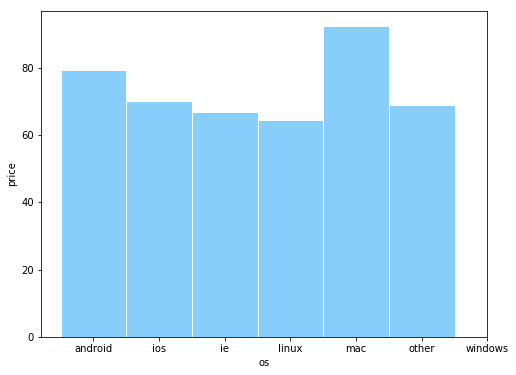

In [81]:
f, ax = plt.subplots(1)
plt.bar( range(len(os_price['os'])) , os_price['price_1458'] , width = 1,facecolor = 'lightskyblue',edgecolor = 'white')
plt.ylabel('price')
plt.xlabel('os')
plt.xticks((0,1,2,3,4,5,6),(u'android',u'ios',u'ie',u'linux',u'mac',u'other',u'windows'))
#plt.title('Price against different os for advertiser 1458')
f.set_size_inches(8,6)
plt.draw()
plt.show()

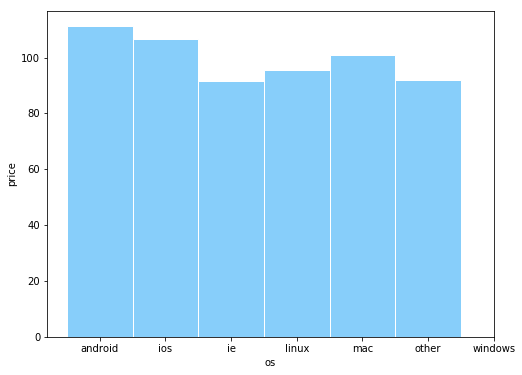

In [82]:
f, ax = plt.subplots(1)
plt.bar( range(len(os_price['os'])) , os_price['price_3358'] , width = 1,facecolor = 'lightskyblue',edgecolor = 'white')
plt.ylabel('price')
plt.xlabel('os')
plt.xticks((0,1,2,3,4,5,6),(u'android',u'ios',u'ie',u'linux',u'mac',u'other',u'windows'))
#plt.title('Price against different os for advertiser 1458')
f.set_size_inches(8,6)
plt.draw()
plt.show()

([<matplotlib.axis.XTick at 0x164d19160>,
 <a list of 6 Text xticklabel objects>)

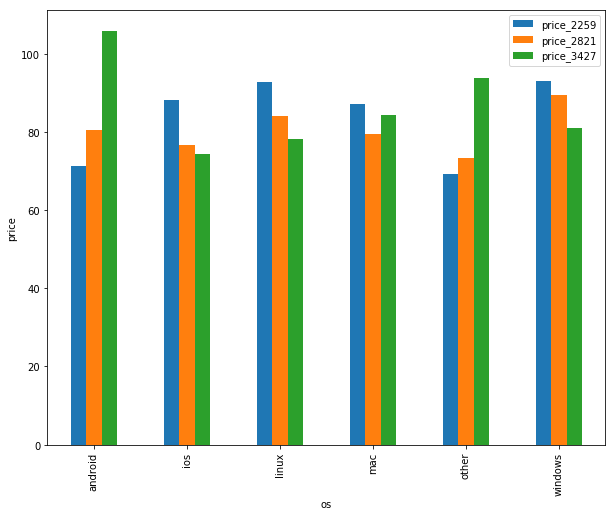

In [351]:
a1 = os_price[['os','price_2259','price_2821','price_3427']]
a1.plot(by='os',kind='bar',figsize=(10,8))
plt.ylabel('price')
plt.xlabel('os')
plt.xticks((0,1,2,3,4,5),(u'android',u'ios',u'linux',u'mac',u'other',u'windows'))

## Browser  price

In [84]:
Browser_price = pd.DataFrame()
Browser_price['Browser'] = np.sort(train.Browser.unique())

In [85]:
for j in advertiser_list:
    Browser_price[j] = 0.00

In [86]:
price = train.groupby(['advertiser','Browser']).payprice.value_counts()

In [87]:
for i in advertiser_list:
    for j in range(len(Browser_price['Browser'])):
        if len(price.iloc[price.index.get_level_values('advertiser') == i][i][Browser_price.loc[j][0]])<1:
            Browser_price[i][j] = 0
        else:
            total_price = 0
            number = 0
            for a in range(len(price[i][Browser_price.loc[j][0]])):
                total_price = price[i][Browser_price.loc[j][0]].index[a] * price[i][Browser_price.loc[j][0]].values[a] + total_price
                number = price[i][Browser_price.loc[j][0]].values[a] + number
            Browser_price[i][j] = (total_price / number).round(3)

/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [88]:
Browser_price.columns = ['Browser','price_1458','price_2259','price_2261','price_2821'
                      ,'price_2997','price_3358','price_3386','price_3427','price_3476']

In [89]:
Browser_price

,Browser,price_1458,price_2259,price_2261,price_2821,price_2997,price_3358,price_3386,price_3427,price_3476
0,chrome,71.646,96.280,94.776,88.809,63.420,95.689,80.608,82.219,79.593
1,firefox,68.452,95.234,92.442,72.149,0.000,69.244,72.393,69.295,77.600
2,ie,67.686,91.197,86.557,90.482,21.333,90.337,74.907,80.350,79.178
3,maxthon,69.229,85.459,72.885,71.729,78.111,93.473,59.960,79.052,78.498
4,opera,67.201,73.903,72.524,66.746,0.000,94.474,75.982,80.658,74.695
5,other,73.711,86.635,85.642,78.577,60.722,104.023,86.799,90.848,79.447
6,safari,66.528,80.432,86.763,81.027,62.673,98.367,83.220,88.062,73.471
7,sogou,91.750,0.000,92.000,68.833,92.000,114.111,108.000,101.800,0.000
8,theworld,66.903,88.127,85.533,83.021,0.000,85.770,68.733,76.112,77.406


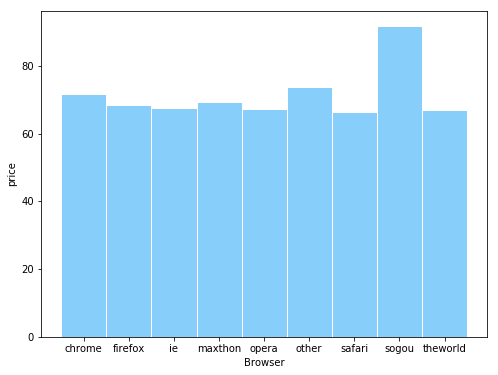

In [90]:
f, ax = plt.subplots(1)
plt.bar( range(len(Browser_price['Browser'])) , Browser_price['price_1458'] , width = 1,facecolor = 'lightskyblue',edgecolor = 'white')
plt.ylabel('price')
plt.xlabel('Browser')
plt.xticks((0,1,2,3,4,5,6,7,8),(u'chrome',u'firefox',u'ie',u'maxthon',u'opera',u'other',u'safari',u'sogou',u'theworld'))
#plt.title('Price against different os for advertiser 1458')
f.set_size_inches(8,6)
plt.draw()
plt.show()

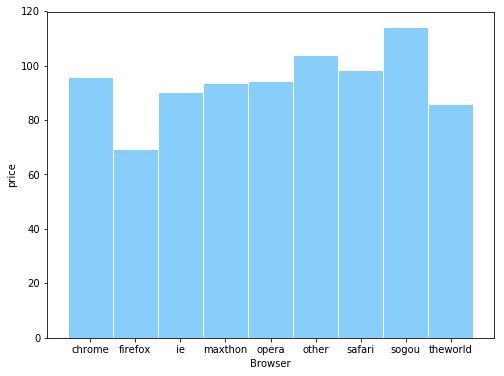

In [91]:
f, ax = plt.subplots(1)
plt.bar( range(len(Browser_price['Browser'])) , Browser_price['price_3358'] , width = 1,facecolor = 'lightskyblue',edgecolor = 'white')
plt.ylabel('price')
plt.xlabel('Browser')
plt.xticks((0,1,2,3,4,5,6,7,8),(u'chrome',u'firefox',u'ie',u'maxthon',u'opera',u'other',u'safari',u'sogou',u'theworld'))
#plt.title('Price against different os for advertiser 1458')
f.set_size_inches(8,6)
plt.draw()
plt.show()

([<matplotlib.axis.XTick at 0x1649d35f8>,
 <a list of 9 Text xticklabel objects>)

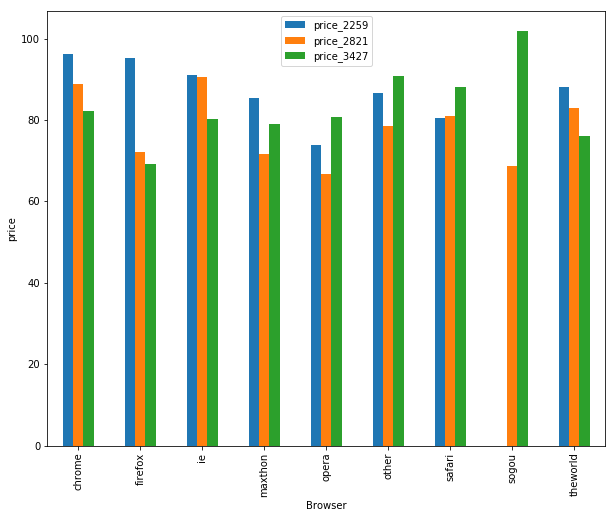

In [350]:
a1 = Browser_price[['Browser','price_2259','price_2821','price_3427']]
a1.plot(by='price',kind='bar',figsize=(10,8))
plt.ylabel('price')
plt.xlabel('Browser')
plt.xticks((0,1,2,3,4,5,6,7,8),(u'chrome',u'firefox',u'ie',u'maxthon',u'opera',u'other',u'safari',u'sogou',u'theworld'))

## daily eCPC 

In [93]:
daily_cost = pd.DataFrame()
daily_cost['weekday'] = np.sort(train.weekday.unique())

In [94]:
for j in advertiser_list:
    daily_cost[j] = 0

In [95]:
daily_cost

,weekday,1458,2259,2261,2821,2997,3358,3386,3427,3476
0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0


In [96]:
cost = train.groupby(['advertiser','weekday']).payprice.value_counts()

In [97]:
for i in advertiser_list:
    for j in daily_cost['weekday']:
        if len(cost.iloc[cost.index.get_level_values('advertiser') == i][i][j])<1:
            daily_cost[i][j] = 0
        else:
            total_cost = 0
            
            for a in range(len(cost[i][j])):
                total_cost = cost[i][j].index[a] * cost[i][j].values[a] + total_cost
                
            daily_cost[i][j] = total_cost

In [98]:
daily_cost.columns = ['weekday','cost_1458','cost_2259','cost_2261','cost_2821'
                      ,'cost_2997','cost_3358','cost_3386','cost_3427','cost_3476']

In [99]:
daily_cost

,weekday,cost_1458,cost_2259,cost_2261,cost_2821,cost_2997,cost_3358,cost_3386,cost_3427,cost_3476
0,0,5322050,3942412,0,9434687,0,2972890,5311453,4191002,5120458
1,1,5319589,2927347,0,8248572,0,2849662,5332442,5214739,4509516
2,2,5308756,0,0,2942507,543166,2551796,5651256,5640380,4365649
3,3,5345263,0,2200127,0,974658,7017407,5460297,5448380,3618007
4,4,5332829,0,3327808,0,1278637,4041530,5723122,5418000,3784235
5,5,5308751,3473178,3601443,0,616766,5718136,5508219,5538293,1188193
6,6,5294001,3306089,1659774,0,0,2993867,5354239,5369317,4895344


In [100]:
daily_eCPC = pd.DataFrame()


daily_eCPC['weekday'] = np.sort(train.weekday.unique())
daily_eCPC['eCPC_1458'] = (daily_cost.cost_1458 / daily_clicks.clicks_1458) .round(2)
daily_eCPC['eCPC_2259'] = (daily_cost.cost_2259 / daily_clicks.clicks_2259) .round(2)
daily_eCPC['eCPC_2261'] = (daily_cost.cost_2261 / daily_clicks.clicks_2261) .round(2)
daily_eCPC['eCPC_2821'] = (daily_cost.cost_2821 / daily_clicks.clicks_2821) .round(2)
daily_eCPC['eCPC_2997'] = (daily_cost.cost_2997 / daily_clicks.clicks_2997) .round(2)
daily_eCPC['eCPC_3358'] = (daily_cost.cost_3358 / daily_clicks.clicks_3358) .round(2)
daily_eCPC['eCPC_3386'] = (daily_cost.cost_3386 / daily_clicks.clicks_3386) .round(2)
daily_eCPC['eCPC_3427'] = (daily_cost.cost_3427 / daily_clicks.clicks_3427) .round(2)
daily_eCPC['eCPC_3476'] = (daily_cost.cost_3476 / daily_clicks.clicks_3476) .round(2)
daily_eCPC.fillna(value= 0 )


,weekday,eCPC_1458,eCPC_2259,eCPC_2261,eCPC_2821,eCPC_2997,eCPC_3358,eCPC_3386,eCPC_3427,eCPC_3476
0,0,80637.12,358401.09,0.00,132882.92,0.00,141566.19,106229.06,91108.74,182873.50
1,1,84437.92,209096.21,0.00,128883.94,0.00,259060.18,113456.21,121273.00,128843.31
2,2,84265.97,0.00,0.00,326945.22,6243.29,182271.14,131424.56,104451.48,155916.04
3,3,78606.81,0.00,244458.56,0.00,14333.21,88827.94,111434.63,118443.04,139154.12
4,4,74067.07,0.00,554634.67,0.00,18530.97,103628.97,100405.65,123136.36,157676.46
5,5,81673.09,347317.80,211849.59,0.00,22843.19,114362.72,79829.26,97163.04,297048.25
6,6,98037.06,330608.90,331954.80,0.00,0.00,157571.95,124517.19,107386.34,163178.13


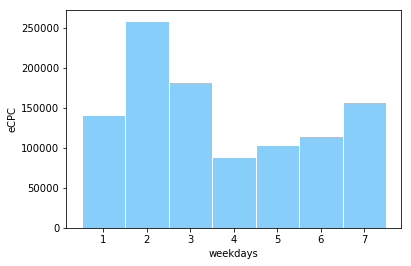

In [417]:
plt.bar(1 + daily_eCPC.weekday,daily_eCPC['eCPC_3358'],width = 1,facecolor = 'lightskyblue',edgecolor = 'white')
plt.ylabel('eCPC')
plt.xlabel('weekdays')
#plt.title('Daily eCPC for advertiser 1458')

## Hourly eCPC 

In [102]:
hourly_cost = pd.DataFrame()
hourly_cost['hour'] = np.sort(train.hour.unique())

In [103]:
for j in advertiser_list:
    hourly_cost[j] = 0

In [104]:
cost = train.groupby(['advertiser','hour']).payprice.value_counts()

In [105]:
for i in advertiser_list:
    for j in hourly_cost['hour']:
        if len(cost.iloc[cost.index.get_level_values('advertiser') == i][i][j])<1:
            hourly_cost[i][j] = 0
        else:
            total_cost = 0
            for a in range(len(cost[i][j])):
                total_cost = cost[i][j].index[a] * cost[i][j].values[a] + total_cost
                
            hourly_cost[i][j] = total_cost

In [106]:
hourly_cost.columns = ['hour','cost_1458','cost_2259','cost_2261','cost_2821'
                      ,'cost_2997','cost_3358','cost_3386','cost_3427','cost_3476']

In [107]:
hourly_cost

,hour,cost_1458,cost_2259,cost_2261,cost_2821,cost_2997,cost_3358,cost_3386,cost_3427,cost_3476
0,0,1681052,859257,470249,598824,11896,8083997,3704694,2006380,1509500
1,1,705333,420914,285181,300110,12084,608769,532612,1272367,635706
2,2,441005,300970,185817,192912,7849,264457,322259,344545,504394
3,3,500885,326937,162962,209261,7508,101112,333986,436088,487990
4,4,241169,236053,101652,139808,6780,103324,225101,107961,264595
5,5,303420,246328,100558,142054,8105,75685,183598,216271,263672
6,6,334901,262306,97443,147977,7029,287324,152540,327199,340230
7,7,739356,284164,183072,209503,7354,218351,711898,1053898,642624
8,8,1123491,512845,378357,365435,13786,653044,1069406,1092378,1054910
9,9,1338139,804177,559100,553857,20834,368615,976159,986473,1343321


In [108]:
hourly_eCPC = pd.DataFrame()


hourly_eCPC['hour'] = np.sort(train.hour.unique())
hourly_eCPC['eCPC_1458'] = (hourly_cost.cost_1458 / hourly_clicks.clicks_1458) .round(2)
hourly_eCPC['eCPC_2259'] = (hourly_cost.cost_2259 / hourly_clicks.clicks_2259) .round(2)
hourly_eCPC['eCPC_2261'] = (hourly_cost.cost_2261 / hourly_clicks.clicks_2261) .round(2)
hourly_eCPC['eCPC_2821'] = (hourly_cost.cost_2821 / hourly_clicks.clicks_2821) .round(2)
hourly_eCPC['eCPC_2997'] = (hourly_cost.cost_2997 / hourly_clicks.clicks_2997) .round(2)
hourly_eCPC['eCPC_3358'] = (hourly_cost.cost_3358 / hourly_clicks.clicks_3358) .round(2)
hourly_eCPC['eCPC_3386'] = (hourly_cost.cost_3386 / hourly_clicks.clicks_3386) .round(2)
hourly_eCPC['eCPC_3427'] = (hourly_cost.cost_3427 / hourly_clicks.clicks_3427) .round(2)
hourly_eCPC['eCPC_3476'] = (hourly_cost.cost_3476 / hourly_clicks.clicks_3476) .round(2)
hourly_eCPC.fillna(value= 0 )
hourly_eCPC.replace('inf', 0)

,hour,eCPC_1458,eCPC_2259,eCPC_2261,eCPC_2821,eCPC_2997,eCPC_3358,eCPC_3386,eCPC_3427,eCPC_3476
0,0,73089.22,286419.00,470249.00,299412.00,0.00,115485.67,108961.59,95541.90,150950.00
1,1,88166.62,420914.00,285181.00,300110.00,0.00,76096.12,133153.00,115669.73,90815.14
2,2,31500.36,300970.00,185817.00,48228.00,0.00,132228.50,80564.75,114848.33,126098.50
3,3,83480.83,163468.50,162962.00,209261.00,0.00,50556.00,111328.67,109022.00,243995.00
4,4,40194.83,0.00,0.00,0.00,6780.00,103324.00,0.00,107961.00,0.00
5,5,75855.00,0.00,0.00,47351.33,0.00,0.00,183598.00,72090.33,0.00
6,6,167450.50,0.00,0.00,0.00,0.00,71831.00,76270.00,81799.75,85057.50
7,7,147871.20,94721.33,0.00,41900.60,7354.00,218351.00,118649.67,95808.91,107104.00
8,8,124832.33,256422.50,0.00,182717.50,0.00,108840.67,89117.17,156054.00,351636.67
9,9,74341.06,402088.50,0.00,138464.25,6944.67,368615.00,108462.11,140924.71,335830.25


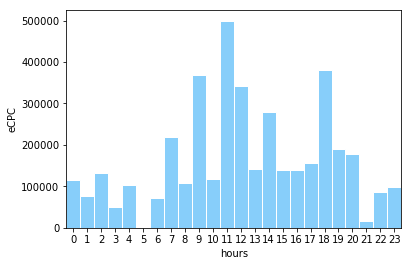

In [418]:
ax = plt.subplot(111)
plt.bar(hourly_eCPC.hour,hourly_eCPC['eCPC_3358'],width = 1,facecolor = 'lightskyblue',edgecolor = 'white')
plt.ylabel('eCPC')
plt.xlabel('hours')
#plt.title('Hourly eCPC for advertiser 1458')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_xlim(xmin = -0.5, xmax = 23.5)
f.set_size_inches(12,10)
plt.draw()
plt.show()

## OS eCPC


In [110]:
os_cost = pd.DataFrame()
os_cost['os'] = np.sort(train.os.unique())

In [111]:
for j in advertiser_list:
        os_cost[j] = 0

In [112]:
cost = train.groupby(['advertiser','os']).payprice.value_counts()

In [113]:
for i in advertiser_list:
    for j in range(len(os_cost['os'])):
        if len(cost.iloc[cost.index.get_level_values('advertiser') == i][i][os_cost.loc[j][0]])<1:
            os_cost[i][j] = 0
        else:
            total_cost = 0
            
            for a in range(len(cost[i][os_cost.loc[j][0]])):
                total_cost = cost[i][os_cost.loc[j][0]].index[a] * cost[i][os_cost.loc[j][0]].values[a] + total_cost
                
            os_cost[i][j] = total_cost 

/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [114]:
os_cost.columns = ['os','cost_1458','cost_2259','cost_2261','cost_2821'
                      ,'cost_2997','cost_3358','cost_3386','cost_3427','cost_3476']

In [115]:
os_cost

,os,cost_1458,cost_2259,cost_2261,cost_2821,cost_2997,cost_3358,cost_3386,cost_3427,cost_3476
0,android,275898,16258,57313,167367,3409784,478684,278641,283510,32349
1,ios,7285,1145,2774,4298,0,7351,7092,5358,2122
2,linux,19966,8075,8783,17813,0,20672,24970,20376,19085
3,mac,737593,157882,321754,439518,0,1031075,757074,726597,179192
4,other,72724,7957,7603,11965,3416,23387,25433,19971,3347
5,windows,36117773,13457709,10390925,19984805,27,26584119,37247818,35764299,27245307


In [116]:
os_clicks = pd.DataFrame()
os_clicks['os'] = np.sort(train.os.unique())

In [117]:
for j in advertiser_list:
        os_clicks[j] = 0

In [118]:
clicks = train.groupby(['advertiser','os']).click.value_counts()

In [119]:
for i in advertiser_list:
    for j in range(len(os_clicks['os'])):
        if len(clicks.iloc[clicks.index.get_level_values('advertiser') == i][i][os_clicks.loc[j][0]])<=1:
            os_clicks[i][j] = 0
        else:
            os_clicks[i][j] = clicks.iloc[clicks.index.get_level_values('advertiser') == i][i][os_clicks.loc[j][0]][1]

/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [120]:
os_clicks.columns = ['os','clicks_1458','clicks_2259','clicks_2261','clicks_2821'
                      ,'clicks_2997','clicks_3358','clicks_3386','clicks_3427','clicks_3476']

In [121]:
os_clicks

,os,clicks_1458,clicks_2259,clicks_2261,clicks_2821,clicks_2997,clicks_3358,clicks_3386,clicks_3427,clicks_3476
0,android,20,1,0,5,251,17,20,25,3
1,ios,0,0,0,0,0,1,1,0,0
2,linux,0,1,0,1,0,0,1,0,0
3,mac,40,4,0,11,0,35,45,33,3
4,other,0,0,0,0,0,1,1,0,0
5,windows,391,39,37,127,0,179,290,282,169


In [122]:
os_eCPC = pd.DataFrame()


os_eCPC['os'] = np.sort(train.os.unique())
os_eCPC['eCPC_1458'] = (os_cost.cost_1458 / os_clicks.clicks_1458) .round(2)
os_eCPC['eCPC_2259'] = (os_cost.cost_2259 / os_clicks.clicks_2259) .round(2)
os_eCPC['eCPC_2261'] = (os_cost.cost_2261 / os_clicks.clicks_2261) .round(2)
os_eCPC['eCPC_2821'] = (os_cost.cost_2821 / os_clicks.clicks_2821) .round(2)
os_eCPC['eCPC_2997'] = (os_cost.cost_2997 / os_clicks.clicks_2997) .round(2)
os_eCPC['eCPC_3358'] = (os_cost.cost_3358 / os_clicks.clicks_3358) .round(2)
os_eCPC['eCPC_3386'] = (os_cost.cost_3386 / os_clicks.clicks_3386) .round(2)
os_eCPC['eCPC_3427'] = (os_cost.cost_3427 / os_clicks.clicks_3427) .round(2)
os_eCPC['eCPC_3476'] = (os_cost.cost_3476 / os_clicks.clicks_3476) .round(2)
#os_eCPC.fillna( value= 0 )

os_eCPC = os_eCPC.replace('inf', 0.0)
os_eCPC = os_eCPC.replace('NaN', 0.0)
os_eCPC

,os,eCPC_1458,eCPC_2259,eCPC_2261,eCPC_2821,eCPC_2997,eCPC_3358,eCPC_3386,eCPC_3427,eCPC_3476
0,android,13794.90,16258.00,0.00,33473.40,13584.8,28157.88,13932.05,11340.40,10783.00
1,ios,0.00,0.00,0.00,0.00,0.0,7351.00,7092.00,0.00,0.00
2,linux,0.00,8075.00,0.00,17813.00,0.0,0.00,24970.00,0.00,0.00
3,mac,18439.82,39470.50,0.00,39956.18,0.0,29459.29,16823.87,22018.09,59730.67
4,other,0.00,0.00,0.00,0.00,0.0,23387.00,25433.00,0.00,0.00
5,windows,92372.82,345069.46,280835.81,157360.67,0.0,148514.63,128440.75,126823.76,161214.83


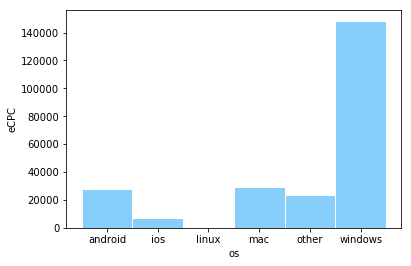

In [419]:
plt.bar( range(len(os_clicks['os'])) , os_eCPC['eCPC_3358'] , width = 1,facecolor = 'lightskyblue',edgecolor = 'white')
plt.ylabel('eCPC')
plt.xlabel('os')
plt.xticks((0,1,2,3,4,5),(u'android',u'ios',u'linux',u'mac',u'other',u'windows'))
#plt.title('os eCPC for advertiser 1458')
f.set_size_inches(12,10)


## Browser eCPC

In [124]:
Browser_cost = pd.DataFrame()
Browser_cost['Browser'] = np.sort(train.Browser.unique())

In [125]:
for j in advertiser_list:
        Browser_cost[j] = 0

In [126]:
cost = train.groupby(['advertiser','Browser']).payprice.value_counts()

In [127]:
for i in advertiser_list:
    for j in range(len(Browser_cost['Browser'])):
        if len(cost.iloc[cost.index.get_level_values('advertiser') == i][i][Browser_cost.loc[j][0]])<1:
            Browser_cost[i][j] = 0
        else:
            total_cost = 0
            
            for a in range(len(cost[i][Browser_cost.loc[j][0]])):
                total_cost = cost[i][Browser_cost.loc[j][0]].index[a] * cost[i][Browser_cost.loc[j][0]].values[a] + total_cost
                
            Browser_cost[i][j] = total_cost 

/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [128]:
Browser_cost.columns = ['Browser','cost_1458','cost_2259','cost_2261','cost_2821'
                      ,'cost_2997','cost_3358','cost_3386','cost_3427','cost_3476']

In [129]:
Browser_cost

,Browser,cost_1458,cost_2259,cost_2261,cost_2821,cost_2997,cost_3358,cost_3386,cost_3427,cost_3476
0,chrome,11611874,5565559,4019470,7875848,7547,9591102,12929331,12634548,9832061
1,firefox,278667,143898,118881,198771,0,248795,303906,298244,336010
2,ie,23779410,7516040,6151659,11710032,64,16423238,23539631,22389633,16687781
3,maxthon,92490,50506,29081,60539,703,81789,102592,90989,96553
4,opera,38170,10716,7470,13950,0,42891,43006,44846,37422
5,other,381160,126401,77335,184656,61390,452709,370284,351762,128387
6,safari,842907,160381,344536,492642,3342879,1160244,846933,809024,167661
7,sogou,367,0,92,413,644,1027,108,509,0
8,theworld,206194,75525,40628,88915,0,143493,205237,200556,195527


In [130]:
Browser_clicks = pd.DataFrame()
Browser_clicks['Browser'] = np.sort(train.Browser.unique())

In [131]:
for j in advertiser_list:
        Browser_clicks[j] = 0

In [132]:
clicks = train.groupby(['advertiser','Browser']).click.value_counts()

In [133]:
for i in advertiser_list:
    for j in range(len(Browser_clicks['Browser'])):
        if len(clicks.iloc[clicks.index.get_level_values('advertiser') == i][i][Browser_clicks.loc[j][0]])<=1:
            Browser_clicks[i][j] = 0
        else:
            Browser_clicks[i][j] = clicks.iloc[clicks.index.get_level_values('advertiser') == i][i][Browser_clicks.loc[j][0]][1]

/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [134]:
Browser_clicks.columns = ['Browser','clicks_1458','clicks_2259','clicks_2261','clicks_2821'
                      ,'clicks_2997','clicks_3358','clicks_3386','clicks_3427','clicks_3476']

In [135]:
Browser_clicks

,Browser,clicks_1458,clicks_2259,clicks_2261,clicks_2821,clicks_2997,clicks_3358,clicks_3386,clicks_3427,clicks_3476
0,chrome,103,16,8,43,0,60,77,65,47
1,firefox,1,1,1,4,0,1,1,2,4
2,ie,283,21,28,78,0,118,212,214,113
3,maxthon,0,0,0,0,0,0,0,1,0
4,opera,1,0,0,0,0,0,0,0,1
5,other,11,2,0,4,7,7,12,9,3
6,safari,49,5,0,15,244,46,56,49,5
7,sogou,0,0,0,0,0,0,0,0,0
8,theworld,3,0,0,0,0,1,0,0,2


In [136]:
Browser_eCPC = pd.DataFrame()


Browser_eCPC['os'] = np.sort(train.Browser.unique())
Browser_eCPC['eCPC_1458'] = (Browser_cost.cost_1458 / Browser_clicks.clicks_1458) .round(2)
Browser_eCPC['eCPC_2259'] = (Browser_cost.cost_2259 / Browser_clicks.clicks_2259) .round(2)
Browser_eCPC['eCPC_2261'] = (Browser_cost.cost_2261 / Browser_clicks.clicks_2261) .round(2)
Browser_eCPC['eCPC_2821'] = (Browser_cost.cost_2821 / Browser_clicks.clicks_2821) .round(2)
Browser_eCPC['eCPC_2997'] = (Browser_cost.cost_2997 / Browser_clicks.clicks_2997) .round(2)
Browser_eCPC['eCPC_3358'] = (Browser_cost.cost_3358 / Browser_clicks.clicks_3358) .round(2)
Browser_eCPC['eCPC_3386'] = (Browser_cost.cost_3386 / Browser_clicks.clicks_3386) .round(2)
Browser_eCPC['eCPC_3427'] = (Browser_cost.cost_3427 / Browser_clicks.clicks_3427) .round(2)
Browser_eCPC['eCPC_3476'] = (Browser_cost.cost_3476 / Browser_clicks.clicks_3476) .round(2)
#os_eCPC.fillna( value= 0 )

Browser_eCPC = Browser_eCPC.replace('inf', 0.0)
Browser_eCPC = Browser_eCPC.replace('NaN', 0.0)
Browser_eCPC

,os,eCPC_1458,eCPC_2259,eCPC_2261,eCPC_2821,eCPC_2997,eCPC_3358,eCPC_3386,eCPC_3427,eCPC_3476
0,chrome,112736.64,347847.44,502433.75,183159.26,0.00,159851.70,167913.39,194377.66,209192.79
1,firefox,278667.00,143898.00,118881.00,49692.75,0.00,248795.00,303906.00,149122.00,84002.50
2,ie,84026.18,357906.67,219702.11,150128.62,0.00,139179.98,111036.00,104624.45,147679.48
3,maxthon,0.00,0.00,0.00,0.00,0.00,0.00,0.00,90989.00,0.00
4,opera,38170.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,37422.00
5,other,34650.91,63200.50,0.00,46164.00,8770.00,64672.71,30857.00,39084.67,42795.67
6,safari,17202.18,32076.20,0.00,32842.80,13700.32,25222.70,15123.80,16510.69,33532.20
7,sogou,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,theworld,68731.33,0.00,0.00,0.00,0.00,143493.00,0.00,0.00,97763.50


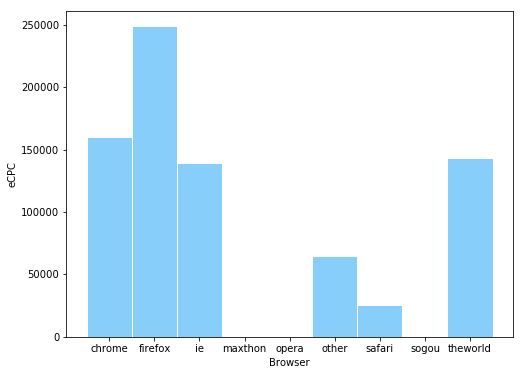

In [420]:
f, ax = plt.subplots(1)
plt.bar( range(len(Browser_clicks['Browser'])) , Browser_eCPC['eCPC_3358'] , width = 1,facecolor = 'lightskyblue',edgecolor = 'white')
plt.ylabel('eCPC')
plt.xlabel('Browser')
plt.xticks((0,1,2,3,4,5,6,7,8),(u'chrome',u'firefox',u'ie',u'maxthon',u'opera',u'other',u'safari',u'sogou',u'theworld'))
#plt.title('Browser eCPC for advertiser 1458')
f.set_size_inches(8,6)
plt.draw()
plt.show()

## slotsize CTR 

/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


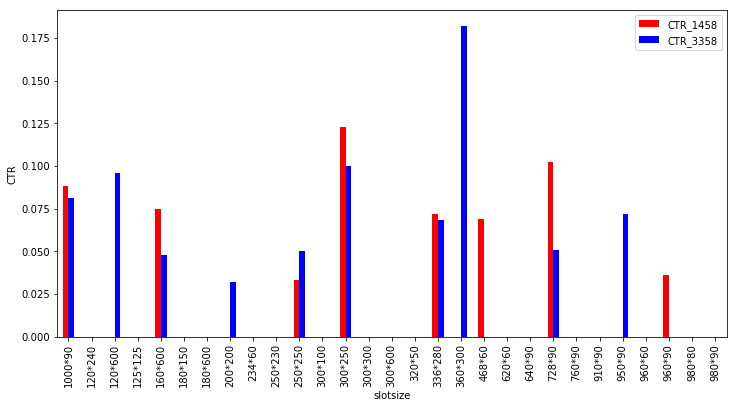

In [138]:
train["slotsize"] = train.slotwidth.astype(str).str.cat(train.slotheight.astype(str), sep='*')
slotsize_imps = pd.DataFrame()
slotsize_imps['slotsize'] = np.sort(train.slotsize.unique())
imps = train.groupby('slotsize').advertiser.value_counts()
for j in advertiser_list:
        slotsize_imps[j] = 0
        
        
for i in range(len(slotsize_imps['slotsize'])):
    x = 0
    for j in imps[slotsize_imps['slotsize'][i]].index:
        slotsize_imps[j][i] = imps[slotsize_imps['slotsize'][i]].values[x]
        x = x+1       
        
slotsize_clicks = pd.DataFrame()
slotsize_clicks['slotsize'] = np.sort(train.slotsize.unique())

for j in advertiser_list:
        slotsize_clicks[j] = 0
        
        
clicks = train.groupby(['advertiser','slotsize']).click.value_counts()

for i in advertiser_list:
    for j in range(len(slotsize_clicks['slotsize'])):
        if len(clicks.iloc[clicks.index.get_level_values('advertiser') == i][i][slotsize_clicks.loc[j][0]])<=1:
            slotsize_clicks[i][j] = 0
        else:
            slotsize_clicks[i][j] = clicks.iloc[clicks.index.get_level_values('advertiser') == i][i][slotsize_clicks.loc[j][0]][1]
            
slotsize_imps.columns = ['slotsize','imps_1458','imps_2259','imps_2261','imps_2821'
                      ,'imps_2997','imps_3358','imps_3386','imps_3427','imps_3476']        
slotsize_clicks.columns = ['slotsize','clicks_1458','clicks_2259','clicks_2261','clicks_2821'
                      ,'clicks_2997','clicks_3358','clicks_3386','clicks_3427','clicks_3476'] 
slotsize_CTR = pd.DataFrame()
slotsize_CTR['slotsize'] = np.sort(train.slotsize.unique())
slotsize_CTR['CTR_1458'] = ((slotsize_clicks.clicks_1458 / slotsize_imps.imps_1458) * 100).round(3)
slotsize_CTR['CTR_2259'] = ((slotsize_clicks.clicks_2259 / slotsize_imps.imps_2259) * 100).round(3)
slotsize_CTR['CTR_2261'] = ((slotsize_clicks.clicks_2261 / slotsize_imps.imps_2261) * 100).round(3)
slotsize_CTR['CTR_2821'] = ((slotsize_clicks.clicks_2821 / slotsize_imps.imps_2821) * 100).round(3)
slotsize_CTR['CTR_2997'] = ((slotsize_clicks.clicks_2997 / slotsize_imps.imps_2997) * 100).round(3)
slotsize_CTR['CTR_3358'] = ((slotsize_clicks.clicks_3358 / slotsize_imps.imps_3358) * 100).round(3)
slotsize_CTR['CTR_3386'] = ((slotsize_clicks.clicks_3386 / slotsize_imps.imps_3386) * 100).round(3)
slotsize_CTR['CTR_3427'] = ((slotsize_clicks.clicks_3427 / slotsize_imps.imps_3427) * 100).round(3)
slotsize_CTR['CTR_3476'] = ((slotsize_clicks.clicks_3476 / slotsize_imps.imps_3476) * 100).round(3)
slotsize_CTR.fillna(value= 0 )

a1 = slotsize_CTR[['slotsize','CTR_1458','CTR_3358']]
a1.plot(by='slotsize',kind='bar',figsize=(12,6),color = ['r','b'])
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28),
           (u'1000*90',u'120*240',u'120*600',u'125*125',u'160*600'
            ,u'180*150',u'180*600',u'200*200',u'234*60',u'250*230'
            ,u'250*250',u'300*100',u'300*250',u'300*300',u'300*600'
            ,u'320*50',u'336*280',u'360*300',u'468*60',u'620*60'
            ,u'640*90',u'728*90',u'760*90',u'910*90',u'950*90'
            ,u'960*60',u'960*90',u'980*80',u'980*90'))
plt.ylabel('CTR')
plt.xlabel('slotsize')


## os CTR 

/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


([<matplotlib.axis.XTick at 0x1621ac710>,
 <a list of 6 Text xticklabel objects>)

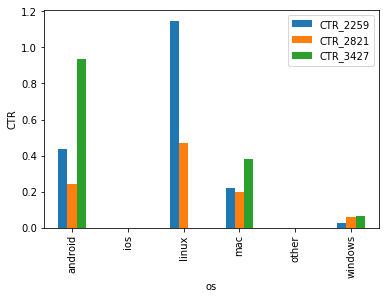

In [353]:
os_imps = pd.DataFrame()
os_imps['os'] = np.sort(train.os.unique())
imps = train.groupby('os').advertiser.value_counts()
for j in advertiser_list:
    os_imps[j] = 0

for i in range(len(os_imps['os'])):
    x = 0
    for j in imps[os_imps['os'][i]].index:
        os_imps[j][i] = imps[os_imps['os'][i]].values[x]
        x = x + 1

os_imps.columns = ['os','imps_1458','imps_2259','imps_2261','imps_2821'
                      ,'imps_2997','imps_3358','imps_3386','imps_3427','imps_3476']

os_CTR = pd.DataFrame()
os_CTR['os'] = np.sort(train.os.unique())
os_CTR['CTR_1458'] = ((os_clicks.clicks_1458 / os_imps.imps_1458) * 100).round(3)
os_CTR['CTR_2259'] = ((os_clicks.clicks_2259 / os_imps.imps_2259) * 100).round(3)
os_CTR['CTR_2261'] = ((os_clicks.clicks_2261 / os_imps.imps_2261) * 100).round(3)
os_CTR['CTR_2821'] = ((os_clicks.clicks_2821 / os_imps.imps_2821) * 100).round(3)
os_CTR['CTR_2997'] = ((os_clicks.clicks_2997 / os_imps.imps_2997) * 100).round(3)
os_CTR['CTR_3358'] = ((os_clicks.clicks_3358 / os_imps.imps_3358) * 100).round(3)
os_CTR['CTR_3386'] = ((os_clicks.clicks_3386 / os_imps.imps_3386) * 100).round(3)
os_CTR['CTR_3427'] = ((os_clicks.clicks_3427 / os_imps.imps_3427) * 100).round(3)
os_CTR['CTR_3476'] = ((os_clicks.clicks_3476 /os_imps.imps_3476) * 100).round(3)
os_CTR.fillna(value= 0 )


a1 = os_CTR[['os','CTR_2259','CTR_2821','CTR_3427']]
a1.plot(by='os',kind='bar',figsize=(6,4))
plt.ylabel('CTR')
plt.xlabel('os')
plt.xticks((0,1,2,3,4,5),(u'android',u'ios',u'linux',u'mac',u'other',u'windows'))


## Brower CTR 

/Users/liuhaoruo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


([<matplotlib.axis.XTick at 0x1654ca780>,
 <a list of 9 Text xticklabel objects>)

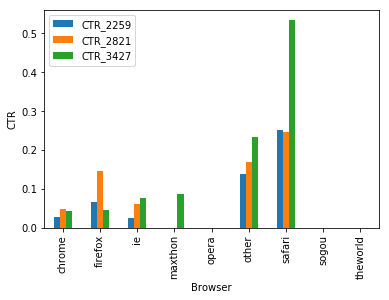

In [354]:
Browser_imps = pd.DataFrame()
Browser_imps['Browser'] = np.sort(train.Browser.unique())
imps = train.groupby('Browser').advertiser.value_counts()
for j in advertiser_list:
    Browser_imps[j] = 0

for i in range(len(Browser_imps['Browser'])):
    x = 0
    for j in imps[Browser_imps['Browser'][i]].index:
        Browser_imps[j][i] = imps[Browser_imps['Browser'][i]].values[x]
        x = x + 1

Browser_imps.columns = ['Browser','imps_1458','imps_2259','imps_2261','imps_2821'
                      ,'imps_2997','imps_3358','imps_3386','imps_3427','imps_3476']

Browser_CTR = pd.DataFrame()
Browser_CTR['Browser'] = np.sort(train.Browser.unique())
Browser_CTR['CTR_1458'] = ((Browser_clicks.clicks_1458 / Browser_imps.imps_1458) * 100).round(3)
Browser_CTR['CTR_2259'] = ((Browser_clicks.clicks_2259 / Browser_imps.imps_2259) * 100).round(3)
Browser_CTR['CTR_2261'] = ((Browser_clicks.clicks_2261 / Browser_imps.imps_2261) * 100).round(3)
Browser_CTR['CTR_2821'] = ((Browser_clicks.clicks_2821 / Browser_imps.imps_2821) * 100).round(3)
Browser_CTR['CTR_2997'] = ((Browser_clicks.clicks_2997 / Browser_imps.imps_2997) * 100).round(3)
Browser_CTR['CTR_3358'] = ((Browser_clicks.clicks_3358 / Browser_imps.imps_3358) * 100).round(3)
Browser_CTR['CTR_3386'] = ((Browser_clicks.clicks_3386 / Browser_imps.imps_3386) * 100).round(3)
Browser_CTR['CTR_3427'] = ((Browser_clicks.clicks_3427 / Browser_imps.imps_3427) * 100).round(3)
Browser_CTR['CTR_3476'] = ((Browser_clicks.clicks_3476 / Browser_imps.imps_3476) * 100).round(3)
Browser_CTR.fillna(value= 0 )

a1 = Browser_CTR[['Browser','CTR_2259','CTR_2821','CTR_3427']]
a1.plot(by='Browser',kind='bar',figsize=(6,4))
plt.ylabel('CTR')
plt.xlabel('Browser')
plt.xticks((0,1,2,3,4,5,6,7,8),(u'chrome',u'firefox',u'ie',u'maxthon',u'opera',u'other',u'safari',u'sogou',u'theworld'))

# Basic Bidding Strategies

In [141]:
validation.columns


Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

## Constant bidding

In [421]:
def constant_bidding(constant):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000
    
    
    for click, pay_price in train[['click','payprice']].values:
            if constant > pay_price:
                impression += 1.0
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost

In [422]:
const = pd.DataFrame()
const['constants'] = np.arange(2,400,1)

im = []
clks = []
ct = []
for con in const['constants']:
    [imps, clicks, cost] = constant_bidding(con)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
const['imps_won'] = im
const['total_spend'] = ct
const['clicks'] = clks
const['CTR'] = (const.clicks/const.imps_won * 100).round(2)
const['CPM'] = (const.total_spend/const.imps_won * 1000).round(2)
const['CPC'] = (const.total_spend/const.clicks).round(2)

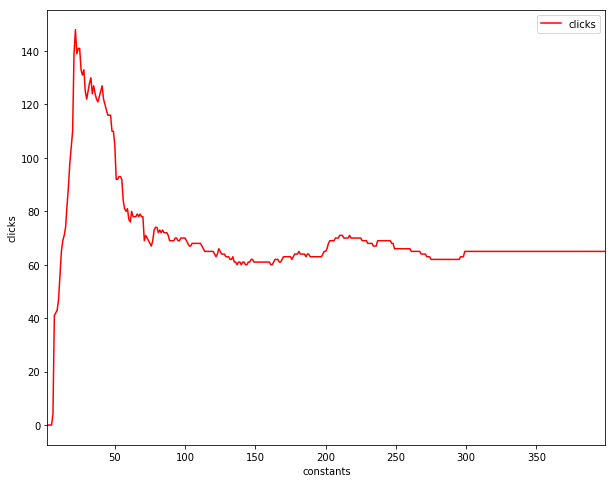

In [423]:
const.plot(x='constants',y='clicks',figsize=(10,8), color='r')
plt.ylabel('clicks')

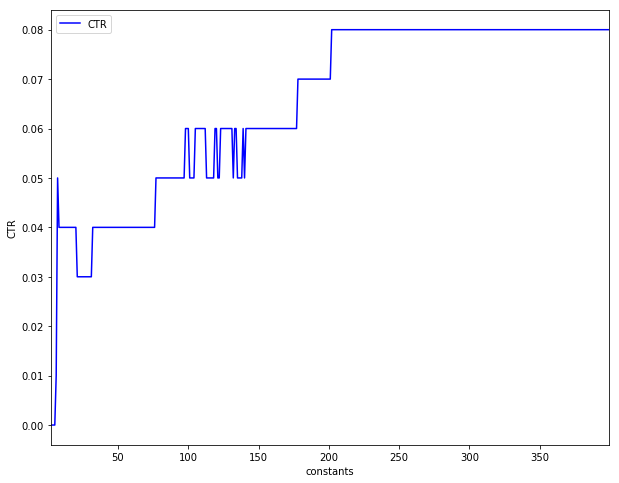

In [424]:
const.plot(x='constants',y='CTR',figsize=(10,8), color='b')
plt.ylabel('CTR')

In [425]:
const.constants[np.where(const.clicks == const.clicks.max())[0]]

20    22
Name: constants, dtype: int64

In [438]:
const.ix[270:301]

,constants,imps_won,total_spend,clicks,CTR,CPM,CPC
270,272,79592.0,6250057.0,63,0.08,78526.20,99207.25
271,273,79541.0,6250082.0,63,0.08,78576.86,99207.65
272,274,79510.0,6250096.0,63,0.08,78607.67,99207.87
273,275,79443.0,6250046.0,62,0.08,78673.34,100807.19
274,276,79391.0,6250048.0,62,0.08,78724.89,100807.23
275,277,79353.0,6250064.0,62,0.08,78762.79,100807.48
276,278,79307.0,6250087.0,62,0.08,78808.77,100807.85
277,279,79266.0,6250058.0,62,0.08,78849.17,100807.39
278,280,79243.0,6250047.0,62,0.08,78871.91,100807.21
279,281,79137.0,6250010.0,62,0.08,78977.09,100806.61


In [428]:
def constant_bidding_v(constant):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000
    
    
    for click, pay_price in validation[['click','payprice']].values:
            if constant > pay_price:
                impression += 1.0
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost

In [457]:
[imps, clicks, cost] = constant_bidding_v(22)

In [458]:
imps

49203.0

In [459]:
clicks

16

In [460]:
cost

691117.0

In [463]:
CTR = clicks / imps
CPM = cost / imps
CPC = cost / clicks


In [464]:
CTR

0.00032518342377497306

In [465]:
CPM

14.046237018068004

In [466]:
CPC

43194.8125

## Random bidding 

In [439]:
from random import randrange

In [440]:
def random_bidding(upper_bound):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000
    
    for click,pay_price in train[['click','payprice']].values:  
        rand_no = randrange(upper_bound)
        if rand_no > pay_price:
            impression += 1
            clicks += click
            cost += pay_price
        if cost >= budget:
                break
    return impression, clicks, cost

In [441]:
randm = pd.DataFrame()
randm['upper_bound'] = np.arange(2,400,1)

im = []
clks = []
ct = []
for upper in randm['upper_bound']:
    [imps, clicks, cost] = random_bidding(upper)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
randm['imps_won'] = im
randm['total_spend'] = ct
randm['clicks'] = clks
randm['CTR'] = (randm.clicks/randm.imps_won * 100).round(2)
randm['CPM'] = (randm.total_spend/randm.imps_won).round(2)
randm['CPC'] = (randm.total_spend/randm.clicks).round(2)

In [442]:
randm.clicks[np.where(randm.clicks == randm.clicks.max())[0]]

47    148
Name: clicks, dtype: int64

In [447]:
randm.ix[47:48]

,upper_bound,imps_won,total_spend,clicks,CTR,CPM,CPC
47,49,351678.0,6250017.0,148,0.04,17.77,42229.84
48,50,347707.0,6250013.0,130,0.04,17.97,48077.02


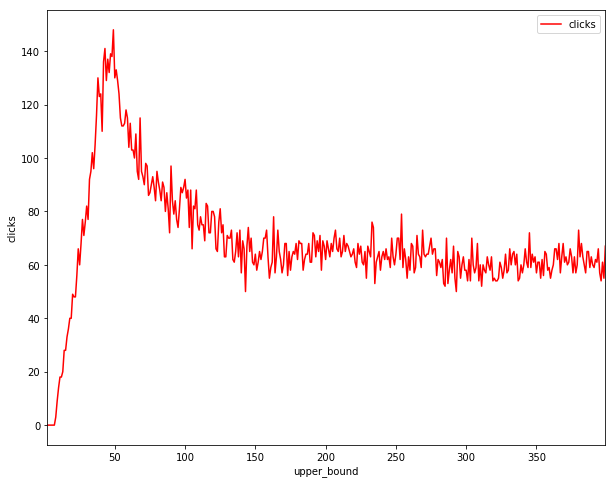

In [444]:
randm.plot(x='upper_bound',y='clicks',figsize=(10,8), color='r')
plt.ylabel('clicks')

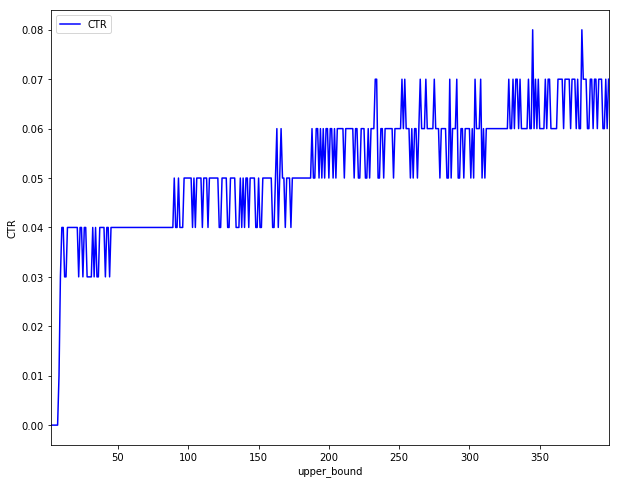

In [445]:
randm.plot(x='upper_bound',y='CTR',figsize=(10,8), color='b')
plt.ylabel('CTR')

In [453]:
def random_bidding_v(upper_bound):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250*1000
    
    for click,pay_price in validation[['click','payprice']].values:  
        rand_no = randrange(upper_bound)
        if rand_no > pay_price:
            impression += 1
            clicks += click
            cost += pay_price
        if cost >= budget:
                break
    return impression, clicks, cost

In [467]:
[imps, clicks, cost] = random_bidding_v(49)

In [468]:
clicks

16

In [469]:
imps

47839.0

In [470]:
cost

847046.0

In [471]:
CTR = clicks / imps
CPM = cost /imps
CPC = cost / clicks

In [472]:
CTR

0.00033445515165450785

In [473]:
CPM

17.706181149271515

In [474]:
CPC

52940.375

# Best Bidding Strategy1

In [279]:
import time

In [280]:
pCTR = pd.read_csv('pCTR.csv')

In [286]:
lambda_range = [1e-10,5e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6,5e-6,1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1]
c_range = np.arange(1,80,2)

In [281]:
nonlinbids = []
clambda = []

for c in c_range:
    for lambdas in lambda_range:
        clambda.append((c,lambdas))
        ortb = np.sqrt(c / lambdas * np.asarray(pCTR['pctr']) + c**2) - c
        nonlinbids.append(ortb)

In [282]:
def non_linear_bidding(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0
    
    # Put different budget sizes here
    budget = 6250*1000   # 1/10
    
    bool_check = bids >= validation.payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
            if cost >= budget:
                break
    return impression, clicks, cost

nonlin = pd.DataFrame()
nonlin['C,Lambda'] = clambda

im = []
clks = []
ct = []

starttime = time.time()
print("Starting Non Linear Bidding")

for bid in nonlinbids:
    [imps, clicks, cost] = non_linear_bidding(bid)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
    
nonlin['imps_won'] = im
nonlin['total_spend'] = ct
nonlin['clicks'] = clks
nonlin['CTR'] = (nonlin.clicks/nonlin.imps_won * 100).round(2).astype(str)
nonlin['CPM'] = (nonlin.total_spend/nonlin.imps_won * 1000).round(2).astype(str)
nonlin['CPC'] = (nonlin.total_spend/nonlin.clicks).round(2).astype(str)

print(" Non Linear Bidding Finished in %s minutes" % round(((time.time() - starttime)/60),2))

Starting Non Linear Bidding
 Non Linear Bidding Finished in 140.2 minutes


In [283]:
nonlin.iloc[np.where(nonlin.clicks == nonlin.clicks.max())[0]]

,"C,Lambda",imps_won,total_spend,clicks,CTR,CPM,CPC
809,"(41, 5e-06)",122189.0,6250070.0,105,0.09,51150.84,59524.48


## change budget  

In [361]:
change_budget = pd.DataFrame()
c = 41 
lambdas = 5e-06
bids = np.sqrt(c / lambdas * np.asarray(pCTR['pctr']) + c**2) - c
change_budget['budgets'] = np.arange(62500,6250000,62500)
change_budget['budgets_percentage'] = np.arange(0.01,1,0.01)
bool_check = bids >= validation.payprice

def change_budget_function(budget):
    impression = 0.0
    clicks = 0
    cost = 0.0
   
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
            if cost >= budget:
                break
    return impression, clicks, cost
im = []
clks = []
ct = []

starttime = time.time()
print("Start")

for j in change_budget['budgets']:
    
    [imps, clicks, cost] = change_budget_function(j)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
    
change_budget['imps_won'] = im
change_budget['total_spend'] = ct
change_budget['clicks'] = clks
change_budget['CTR'] = (change_budget.clicks/change_budget.imps_won * 100).round(2)
change_budget['CPM'] = (change_budget.total_spend/change_budget.imps_won * 1000).round(2)
change_budget['CPC'] = (change_budget.total_spend/change_budget.clicks).round(2)

print(" Non Linear Bidding Finished in %s minutes" % round(((time.time() - starttime)/60),2))

Start
 Non Linear Bidding Finished in 6.67 minutes


(0.01, 1.0)

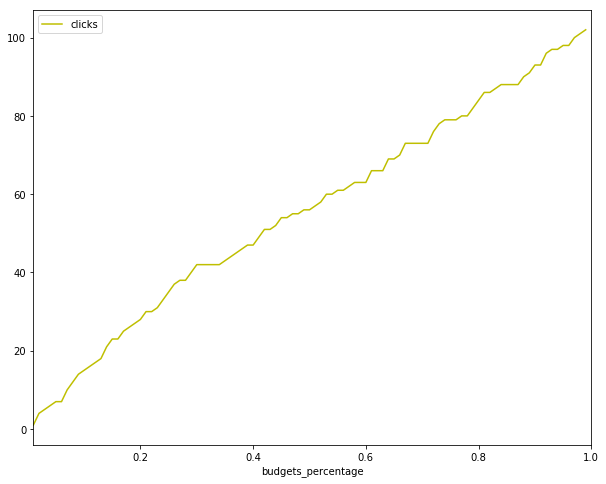

In [362]:
ax = change_budget.plot(x='budgets_percentage',y='clicks',figsize=(10,8), color='Y')
ax.set_xlim(xmin = 0.01 , xmax = 1.00)

# Best Bidding Strategy2 

In [357]:
nonlinbids_2 = []
clambda_2 = []

for c in c_range:
    for lambdas in lambda_range:
        clambda_2.append((c,lambdas))
        ortb = (((np.asarray(pCTR['pctr']) + np.sqrt(c**2 * lambdas**2 * np.asarray(pCTR['pctr'])**2))
                
                /(c*lambdas) )**(1/3) - 
        ((c*lambdas)/(np.asarray(pCTR['pctr']) + np.sqrt(c**2 * lambdas**2 * np.asarray(pCTR['pctr'])**2))
                )**(1/3))*c
        
        nonlinbids_2.append(ortb)
        
        
nonlin_2 = pd.DataFrame()
nonlin_2['C,Lambda'] = clambda_2

im_2 = []
clks_2 = []
ct_2 = []

starttime = time.time()
print("Starting Non Linear Bidding")

for bid in nonlinbids_2:
    [imps_2, clicks_2, cost_2] = non_linear_bidding(bid)
    im_2.append(imps_2)
    clks_2.append(clicks_2)
    ct_2.append(cost_2)
    
nonlin_2['imps_won'] = im_2
nonlin_2['total_spend'] = ct_2
nonlin_2['clicks'] = clks_2
nonlin_2['CTR'] = (nonlin_2.clicks/nonlin_2.imps_won * 100).round(2)
nonlin_2['CPM'] = (nonlin_2.total_spend/nonlin_2.imps_won * 1000).round(2)
nonlin_2['CPC'] = (nonlin_2.total_spend/nonlin_2.clicks).round(2)

print(" Non Linear Bidding Finished in %s minutes" % round(((time.time() - starttime)/60),2))

Starting Non Linear Bidding
 Non Linear Bidding Finished in 72.88 minutes


In [358]:
nonlin.iloc[np.where(nonlin.clicks == nonlin.clicks.max())[0]]

,"C,Lambda",imps_won,total_spend,clicks,CTR,CPM,CPC
809,"(41, 5e-06)",122189.0,6250070.0,105,0.09,51150.84,59524.48


In [366]:
change_budget_2 = pd.DataFrame()
 
bids = (((np.asarray(pCTR['pctr']) + np.sqrt(c**2 * lambdas**2 * np.asarray(pCTR['pctr'])**2))
                
                /(c*lambdas) )**(1/3) - 
        ((c*lambdas)/(np.asarray(pCTR['pctr']) + np.sqrt(c**2 * lambdas**2 * np.asarray(pCTR['pctr'])**2))
                )**(1/3))*c
change_budget_2['budgets'] = np.arange(62500,6250000,62500)
change_budget_2['budgets_percentage'] = np.arange(0.01,1,0.01)
bool_check = bids >= validation.payprice

def change_budget_function(budget):
    impression = 0.0
    clicks = 0
    cost = 0.0
   
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
            if cost >= budget:
                break
    return impression, clicks, cost
im_2 = []
clks_2 = []
ct_2 = []

starttime = time.time()
print("Start")

for j in change_budget_2['budgets']:
    
    [imps, clicks, cost] = change_budget_function(j)
    im_2.append(imps)
    clks_2.append(clicks)
    ct_2.append(cost)
    
change_budget_2['imps_won'] = im_2
change_budget_2['total_spend'] = ct_2
change_budget['clicks_2'] = clks_2
#change_budget['CTR_2'] = (change_budget_2.clicks/change_budget_2.imps_won * 100).round(2)
#change_budget_2['CPM'] = (change_budget_2.total_spend/change_budget_2.imps_won * 1000).round(2)
#change_budget_2['CPC'] = (change_budget_2.total_spend/change_budget_2.clicks).round(2)

print(" Non Linear Bidding Finished in %s minutes" % round(((time.time() - starttime)/60),2))

Start
 Non Linear Bidding Finished in 7.89 minutes


In [415]:
a = pd.DataFrame()
a = change_budget.rename(columns={'clicks':'ORTB','clicks_2':'altered ORTB'})

(0.01, 1.0)

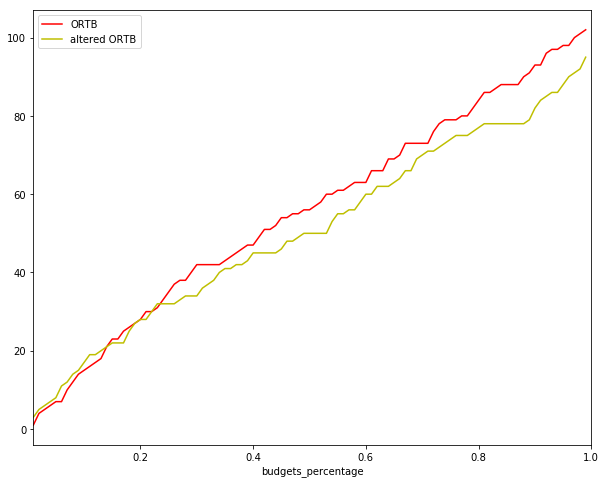

In [416]:
ax = a.plot(x='budgets_percentage',y=['ORTB','altered ORTB'],figsize=(10,8), color='RY',\
                        legend = 'ORBT')

ax.set_xlim(xmin = 0.01 , xmax = 1.00)